# **ML Project: PAPER 3**

**Introduction:**

Objective: reproducing the results of Paper 3.

Dataset Overview: Telco-Customer-Churn dataset

Machine Learning Techniques:

*   Regression logistique

*   Decision Tree



*  Random Forest
*   XGBoost

*  SVM
*  GBM


Structure:
1. Business understanding
2. Data understanding
3. Data cleaning
4. Modeling & Evaluation.

# **Business Understanding**

Customer churn is a significant problem in the telecom industry, and predicting it accurately is crucial for companies to take proactive measures to retain customers. Machine learning techniques have shown promise in improving the accuracy of churn prediction models.

 ## Problem Statement :

Customer churn poses a significant challenge for telecom companies, leading to substantial revenue losses. Traditional methods of predicting churn often fall short, highlighting the need for more accurate and efficient prediction models. To address this issue, it is crucial to identify the key factors driving customer churn, as this understanding forms the foundation for developing effective customer retention strategies.

## Goals :





*   Predict customer churn using state-of-the-art machine learning models.
*   Identify the most effective classification model for churn prediction using evaluation metrics.
*   Using statistical tests like the Wilcoxon signed-rank test, the study confirms the superiority of GBM in terms of accuracy and reliability compared to other models.





# **Data Understanding**

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

In [3]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier



----



## Dataset Treatment

We first combined the datasets

In [6]:
train_df = pd.read_csv(r'C:\Users\Nassi\Desktop\ML Project\ML_Project_Files\archive (2)\churn-bigml-80.csv')
test_df = pd.read_csv(r'C:\Users\Nassi\Desktop\ML Project\ML_Project_Files\archive (2)\churn-bigml-20.csv')

combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

print("\nCombined Dataset Shape:", combined_df.shape)



Combined Dataset Shape: (3333, 20)


In [7]:
combined_df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [8]:
# Describe the columns
print("Dataset Description:")
print(combined_df.describe(include='all'))

Dataset Description:
       State  Account length    Area code International plan Voice mail plan  \
count   3333     3333.000000  3333.000000               3333            3333   
unique    51             NaN          NaN                  2               2   
top       WV             NaN          NaN                 No              No   
freq     106             NaN          NaN               3010            2411   
mean     NaN      101.064806   437.182418                NaN             NaN   
std      NaN       39.822106    42.371290                NaN             NaN   
min      NaN        1.000000   408.000000                NaN             NaN   
25%      NaN       74.000000   408.000000                NaN             NaN   
50%      NaN      101.000000   415.000000                NaN             NaN   
75%      NaN      127.000000   510.000000                NaN             NaN   
max      NaN      243.000000   510.000000                NaN             NaN   

        Number vma

In [9]:
# Note the target variable
target_variable = 'Churn'
print(f"\nTarget Variable: {target_variable}")


Target Variable: Churn


### Exploratory Data Analysis (EDA)

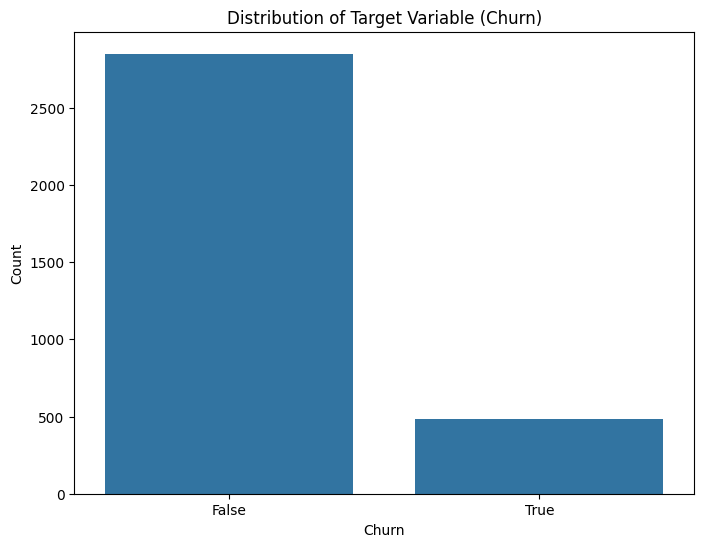

In [10]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=target_variable, data=combined_df)
plt.title('Distribution of Target Variable (Churn)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

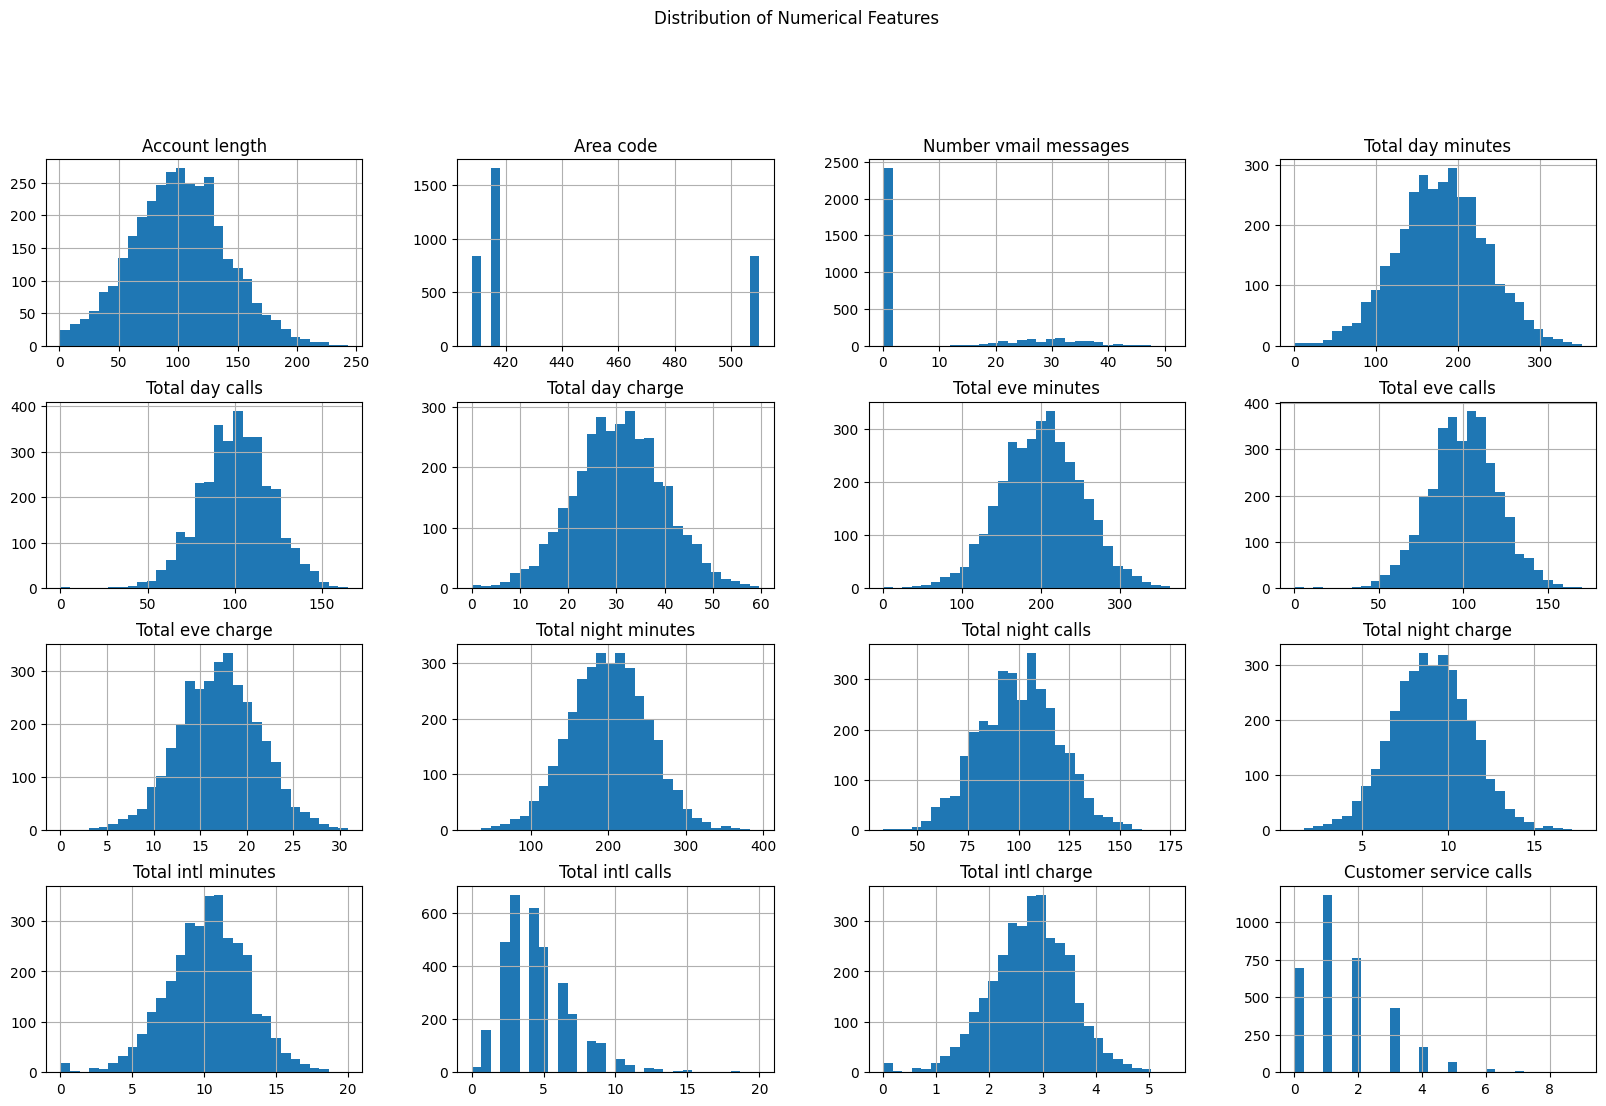

In [11]:
# Distribution of numerical features
numeric_features = combined_df.select_dtypes(include=[np.number]).columns.tolist()
combined_df[numeric_features].hist(figsize=(20, 15), bins=30, layout=(5, 4))
plt.suptitle('Distribution of Numerical Features')
plt.show()

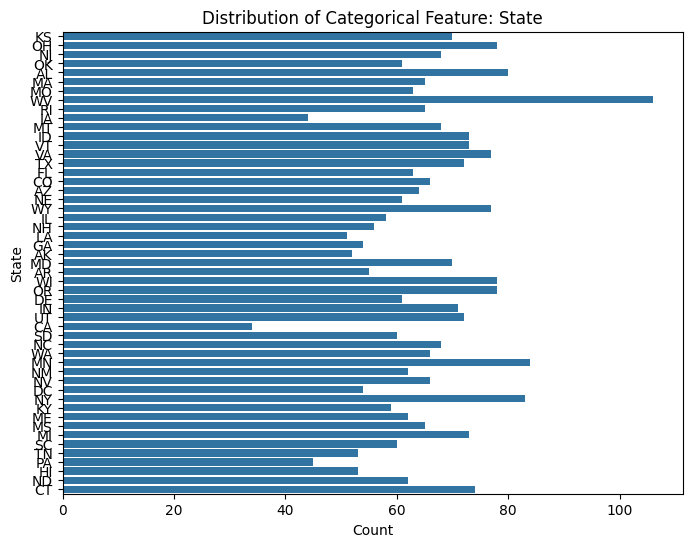

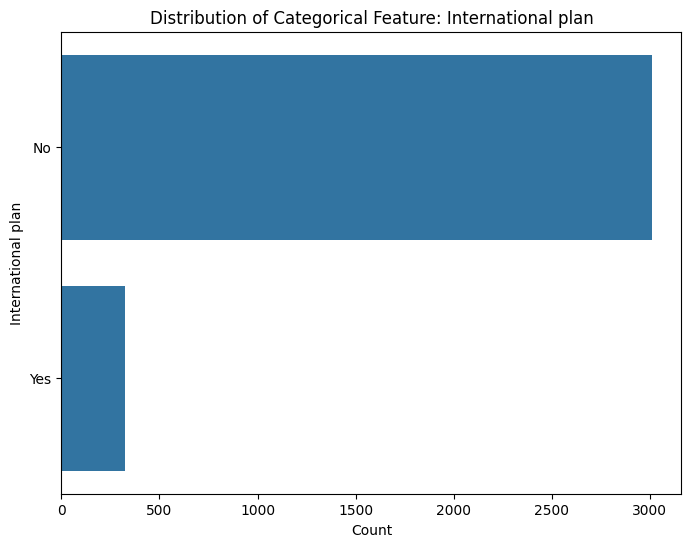

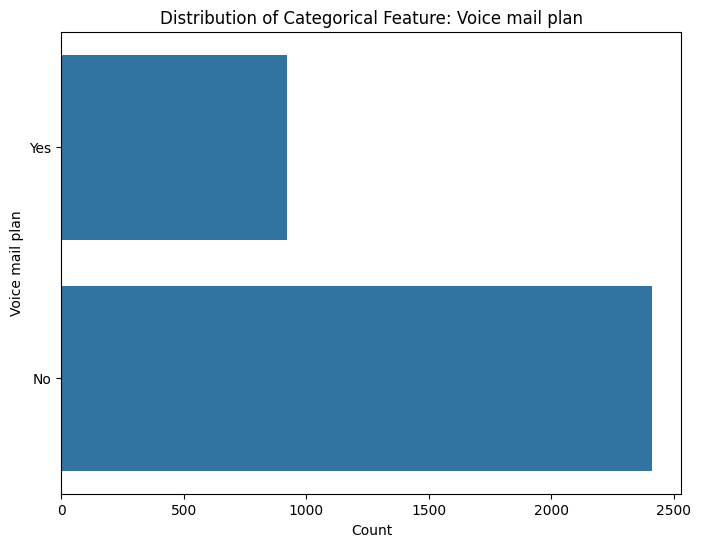

In [12]:
# Distribution of categorical features
categorical_features = combined_df.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=feature, data=combined_df)
    plt.title(f'Distribution of Categorical Feature: {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()



----

# **Data Cleaning**


## Missing values

In [13]:
#Check for missing values
print("Missing values in dataset:\n", combined_df.isnull().sum())

Missing values in dataset:
 State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


***No Missing values found***

## Data Types

In [14]:
#Check for inconsistent data types or values
print("\nData types in the dataset:\n", combined_df.dtypes)


Data types in the dataset:
 State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


## Treating Outliers

Outliers Summary Before Handling:
                        Outlier Count  Percentage
Account length                   18.0    0.540054
Area code                         0.0    0.000000
Number vmail messages             1.0    0.030003
Total day minutes                25.0    0.750075
Total day calls                  23.0    0.690069
Total day charge                 25.0    0.750075
Total eve minutes                24.0    0.720072
Total eve calls                  20.0    0.600060
Total eve charge                 24.0    0.720072
Total night minutes              30.0    0.900090
Total night calls                22.0    0.660066
Total night charge               30.0    0.900090
Total intl minutes               46.0    1.380138
Total intl calls                 78.0    2.340234
Total intl charge                49.0    1.470147
Customer service calls          267.0    8.010801


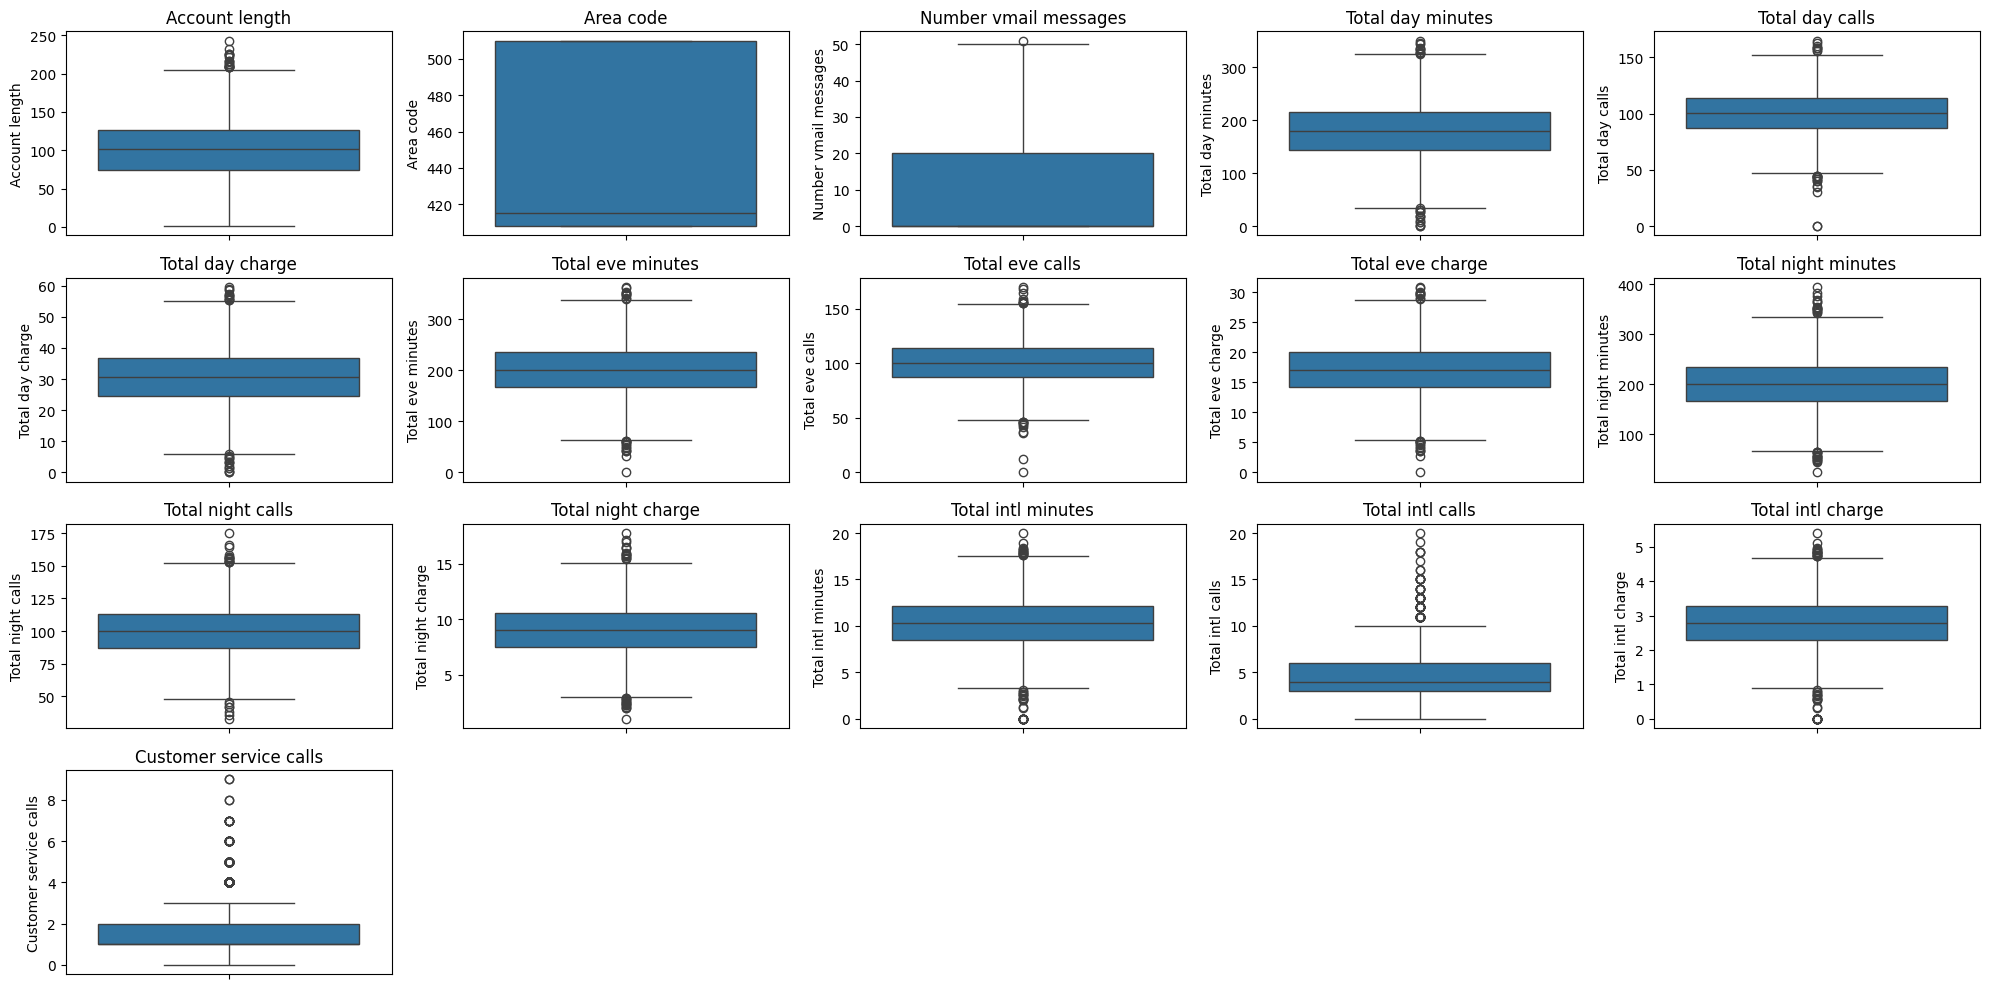

In [15]:
# Function to identify outliers using IQR
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Identify numeric columns (excluding 'International plan')
numeric_cols = combined_df.select_dtypes(include=np.number).columns.tolist()


# View outliers before handling
total_rows = combined_df.shape[0]
outliers_info = {}

# Check outliers for each numeric column
for col in numeric_cols:
    outliers = find_outliers(combined_df, col)
    outlier_count = outliers.shape[0]
    percentage = (outlier_count / total_rows) * 100
    outliers_info[col] = {"count": outlier_count, "percentage": percentage}

# Display summary of outliers
outliers_summary = pd.DataFrame(outliers_info).T
outliers_summary.columns = ["Outlier Count", "Percentage"]
print("Outliers Summary Before Handling:")
print(outliers_summary)

# Visualize outliers before handling (only continuous variables)
plt.figure(figsize=(20, 10))

# Plot boxplots for numeric columns (continuous data)
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=combined_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [16]:
columns_to_remove_outliers = []
for col, info in outliers_info.items():
    if info["percentage"] < 5:
        columns_to_remove_outliers.append(col)

print("\nColumns to remove outliers from (less than 5% outliers):", columns_to_remove_outliers)


Columns to remove outliers from (less than 5% outliers): ['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge']


In [17]:
def remove_outliers(df):
    df_cleaned = df.copy()
    for col in columns_to_remove_outliers:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

combined_df_cleaned = remove_outliers(combined_df)

Customer service calls has 8% of its values as outliers, we will let them because we need these outliers






Total Rows Before Outlier Removal: 3333
Total Rows After Outlier Removal: 3053
Outliers Removed: 280 (8.40%)


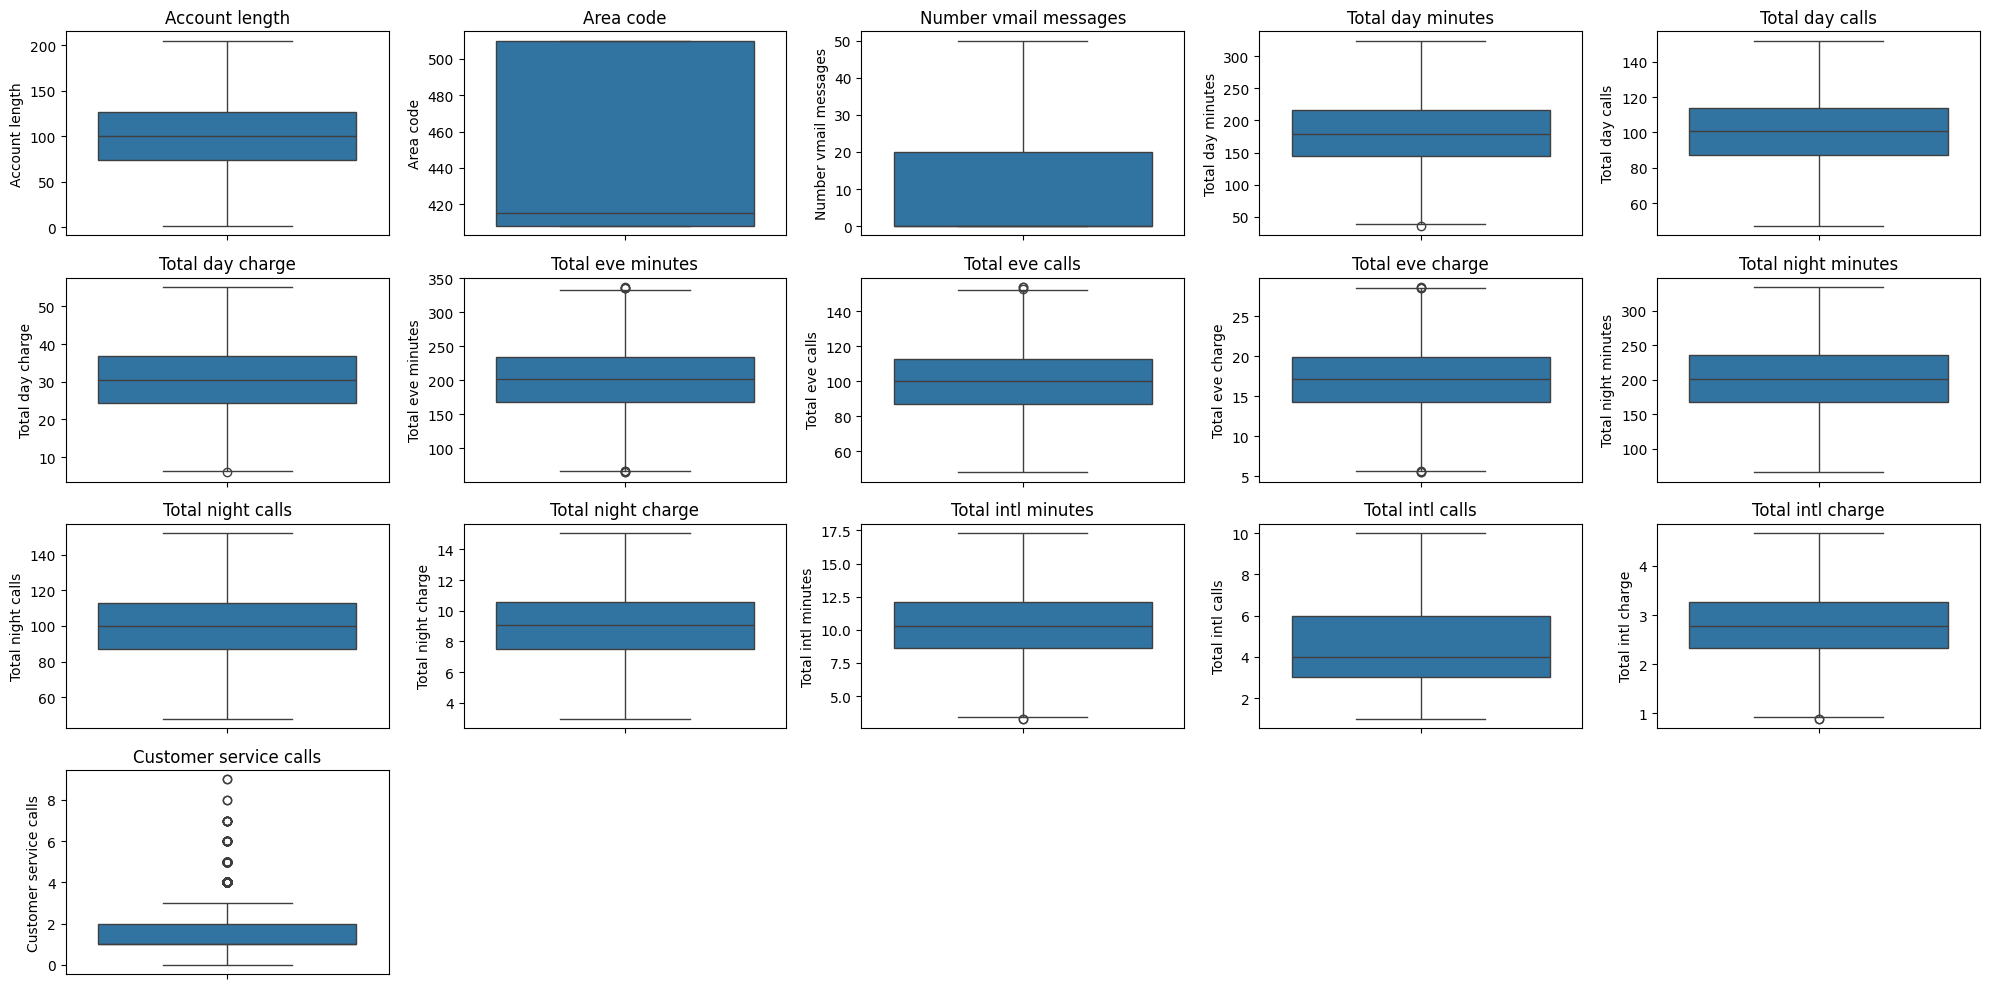

In [18]:
# View outliers after handling
total_rows_cleaned = combined_df_cleaned.shape[0]
outliers_removed = total_rows - total_rows_cleaned
percentage_removed = (outliers_removed / total_rows) * 100

print(f"\nTotal Rows Before Outlier Removal: {total_rows}")
print(f"Total Rows After Outlier Removal: {total_rows_cleaned}")
print(f"Outliers Removed: {outliers_removed} ({percentage_removed:.2f}%)")

# Visualize data after removing outliers (only continuous variables)
plt.figure(figsize=(20, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=combined_df_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Encoding

In [19]:
# 3. Encoding Categorical Variables
# Encode 'International plan', 'Voice mail plan' and 'churn'
label_encoder = LabelEncoder()
combined_df_cleaned['International plan'] = label_encoder.fit_transform(combined_df_cleaned['International plan'])
combined_df_cleaned['Voice mail plan'] = label_encoder.fit_transform(combined_df_cleaned['Voice mail plan'])
combined_df_cleaned['Churn'] = label_encoder.fit_transform(combined_df_cleaned['Churn'])



In [20]:
combined_df_cleaned = pd.get_dummies(combined_df_cleaned, columns=['State'], prefix='State')

# Convert all State columns to integers
state_columns = [col for col in combined_df_cleaned.columns if col.startswith('State_')]
combined_df_cleaned[state_columns] = combined_df_cleaned[state_columns].astype(int)

print(combined_df_cleaned.dtypes)
combined_df_cleaned.head()


Account length           int64
Area code                int64
International plan       int64
Voice mail plan          int64
Number vmail messages    int64
                         ...  
State_VT                 int64
State_WA                 int64
State_WI                 int64
State_WV                 int64
State_WY                 int64
Length: 70, dtype: object


Account length  Area code  International plan  Voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
4              75        415                   1                0   
5             118        510                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
4                      0              166.7              113   
5                      0              223.4               98   

   Total day charge  Total eve minutes  Total eve calls  ...  State_SD  \
0             45.07              197.4               99  ...         0   
1             27.47              195.5              103  ...         0   
2             41.38              121.2              110  ...         0   
4             28.34              148.3              122  ...         0   
5             37.98              220.6              101  ...         0   

   State_TN  State_TX  State_UT  State_VA  State_VT  State_WA  State_WI  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   
5         0         0         0         0         0         0         0   

   State_WV  State_WY  
0         0         0  
1         0         0  
2         0         0  
4         0         0  
5         0         0  

[5 rows x 70 columns]

## Correlation

### correlation with target variable

Correlation with target (Churn):
Churn                     1.000000
International plan        0.251840
Customer service calls    0.218940
Total day minutes         0.186933
Total day charge          0.186928
                            ...   
State_AZ                 -0.030607
State_VA                 -0.035369
Total intl calls         -0.075953
Number vmail messages    -0.083501
Voice mail plan          -0.095121
Name: Churn, Length: 70, dtype: float64


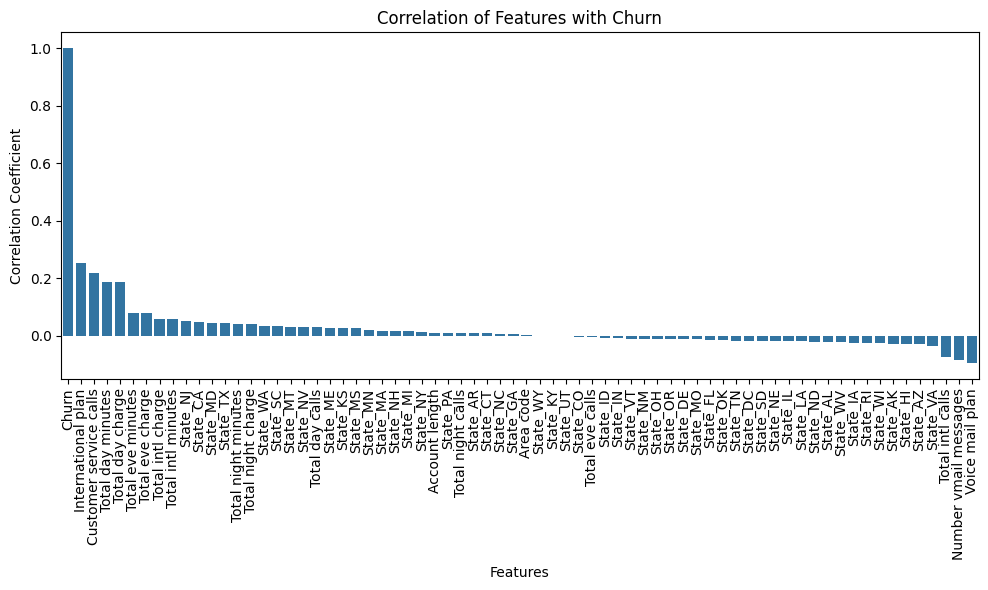

Features with low correlation (below 0.03): ['State_NV', 'Total day calls', 'State_ME', 'State_KS', 'State_MS', 'State_MN', 'State_MA', 'State_NH', 'State_MI', 'State_NY', 'Account length', 'State_PA', 'Total night calls', 'State_AR', 'State_CT', 'State_NC', 'State_GA', 'Area code', 'State_WY', 'State_KY', 'State_UT', 'State_CO', 'Total eve calls', 'State_ID', 'State_IN', 'State_VT', 'State_NM', 'State_OH', 'State_OR', 'State_DE', 'State_MO', 'State_FL', 'State_OK', 'State_TN', 'State_DC', 'State_SD', 'State_NE', 'State_IL', 'State_LA', 'State_ND', 'State_AL', 'State_WV', 'State_IA', 'State_RI', 'State_WI', 'State_AK', 'State_HI']


In [21]:
# 4. Correlation Analysis
correlation_with_target = combined_df_cleaned.corr()['Churn'].sort_values(ascending=False)
print("Correlation with target (Churn):")
print(correlation_with_target)

# Visualize correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Drop low-correlation features
threshold = 0.03
least_correlated_features = correlation_with_target[abs(correlation_with_target) < threshold].index.tolist()
print(f"Features with low correlation (below {threshold}): {least_correlated_features}")
combined_df_cleaned = combined_df_cleaned.drop(columns=least_correlated_features)


### correlation between all varaibles

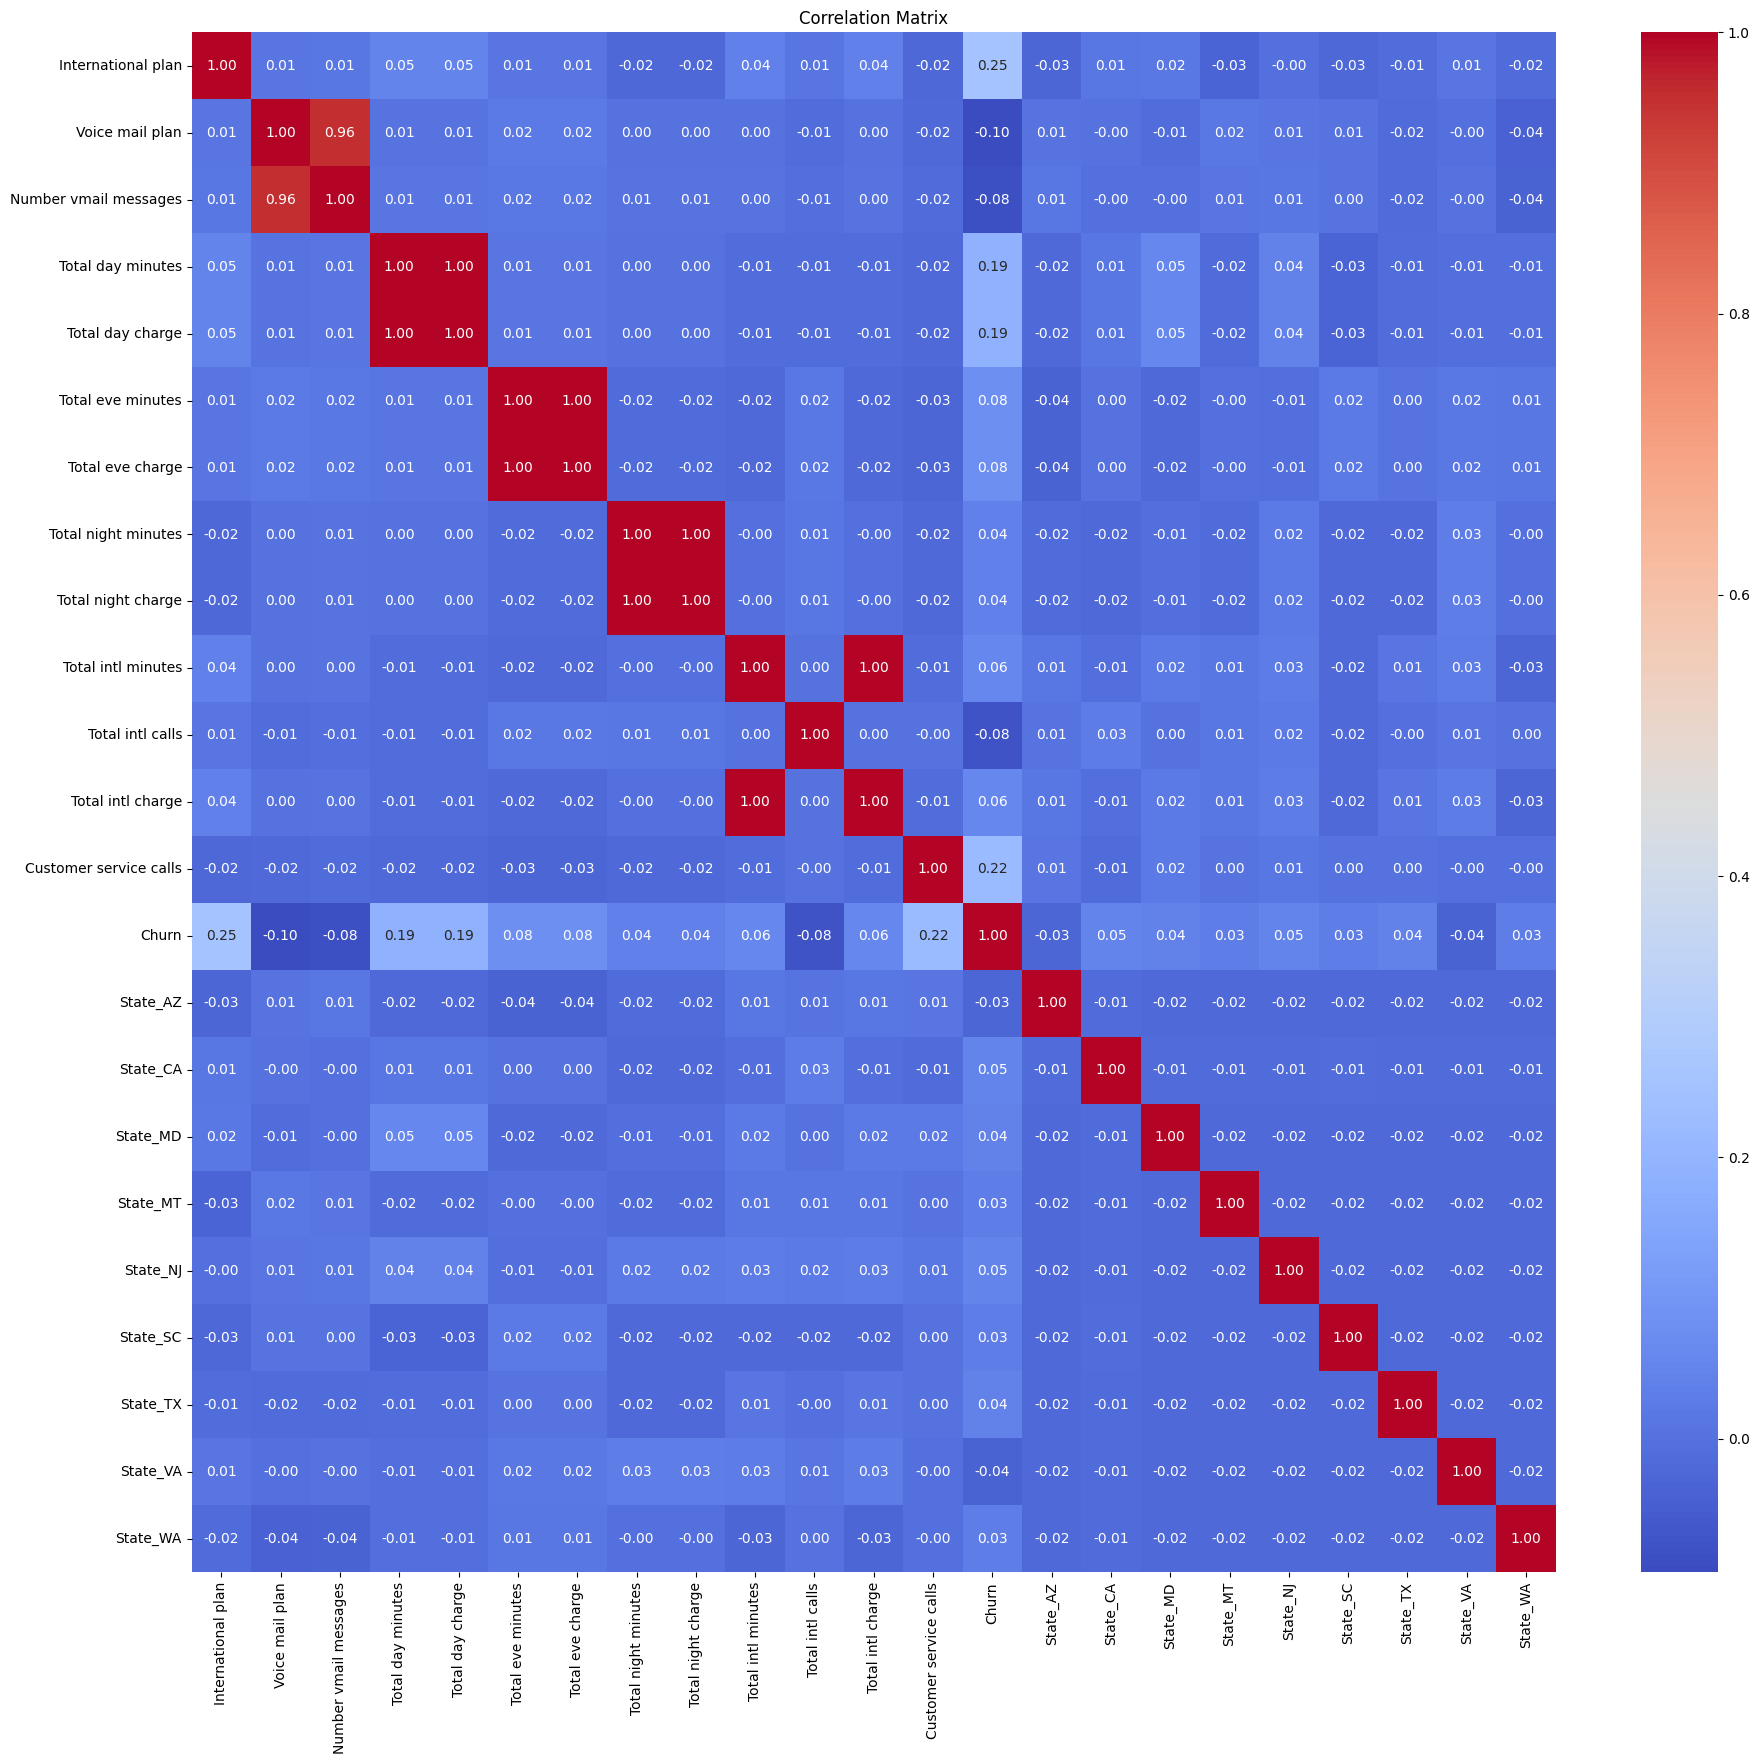

In [22]:
plt.figure(figsize=(22, 20))
correlation_matrix = combined_df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Drop the specified columns
columns_to_drop = ['Voice mail plan', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
combined_df_cleaned = combined_df_cleaned.drop(columns=columns_to_drop, errors='ignore')


***Heavily correlated columns removed***

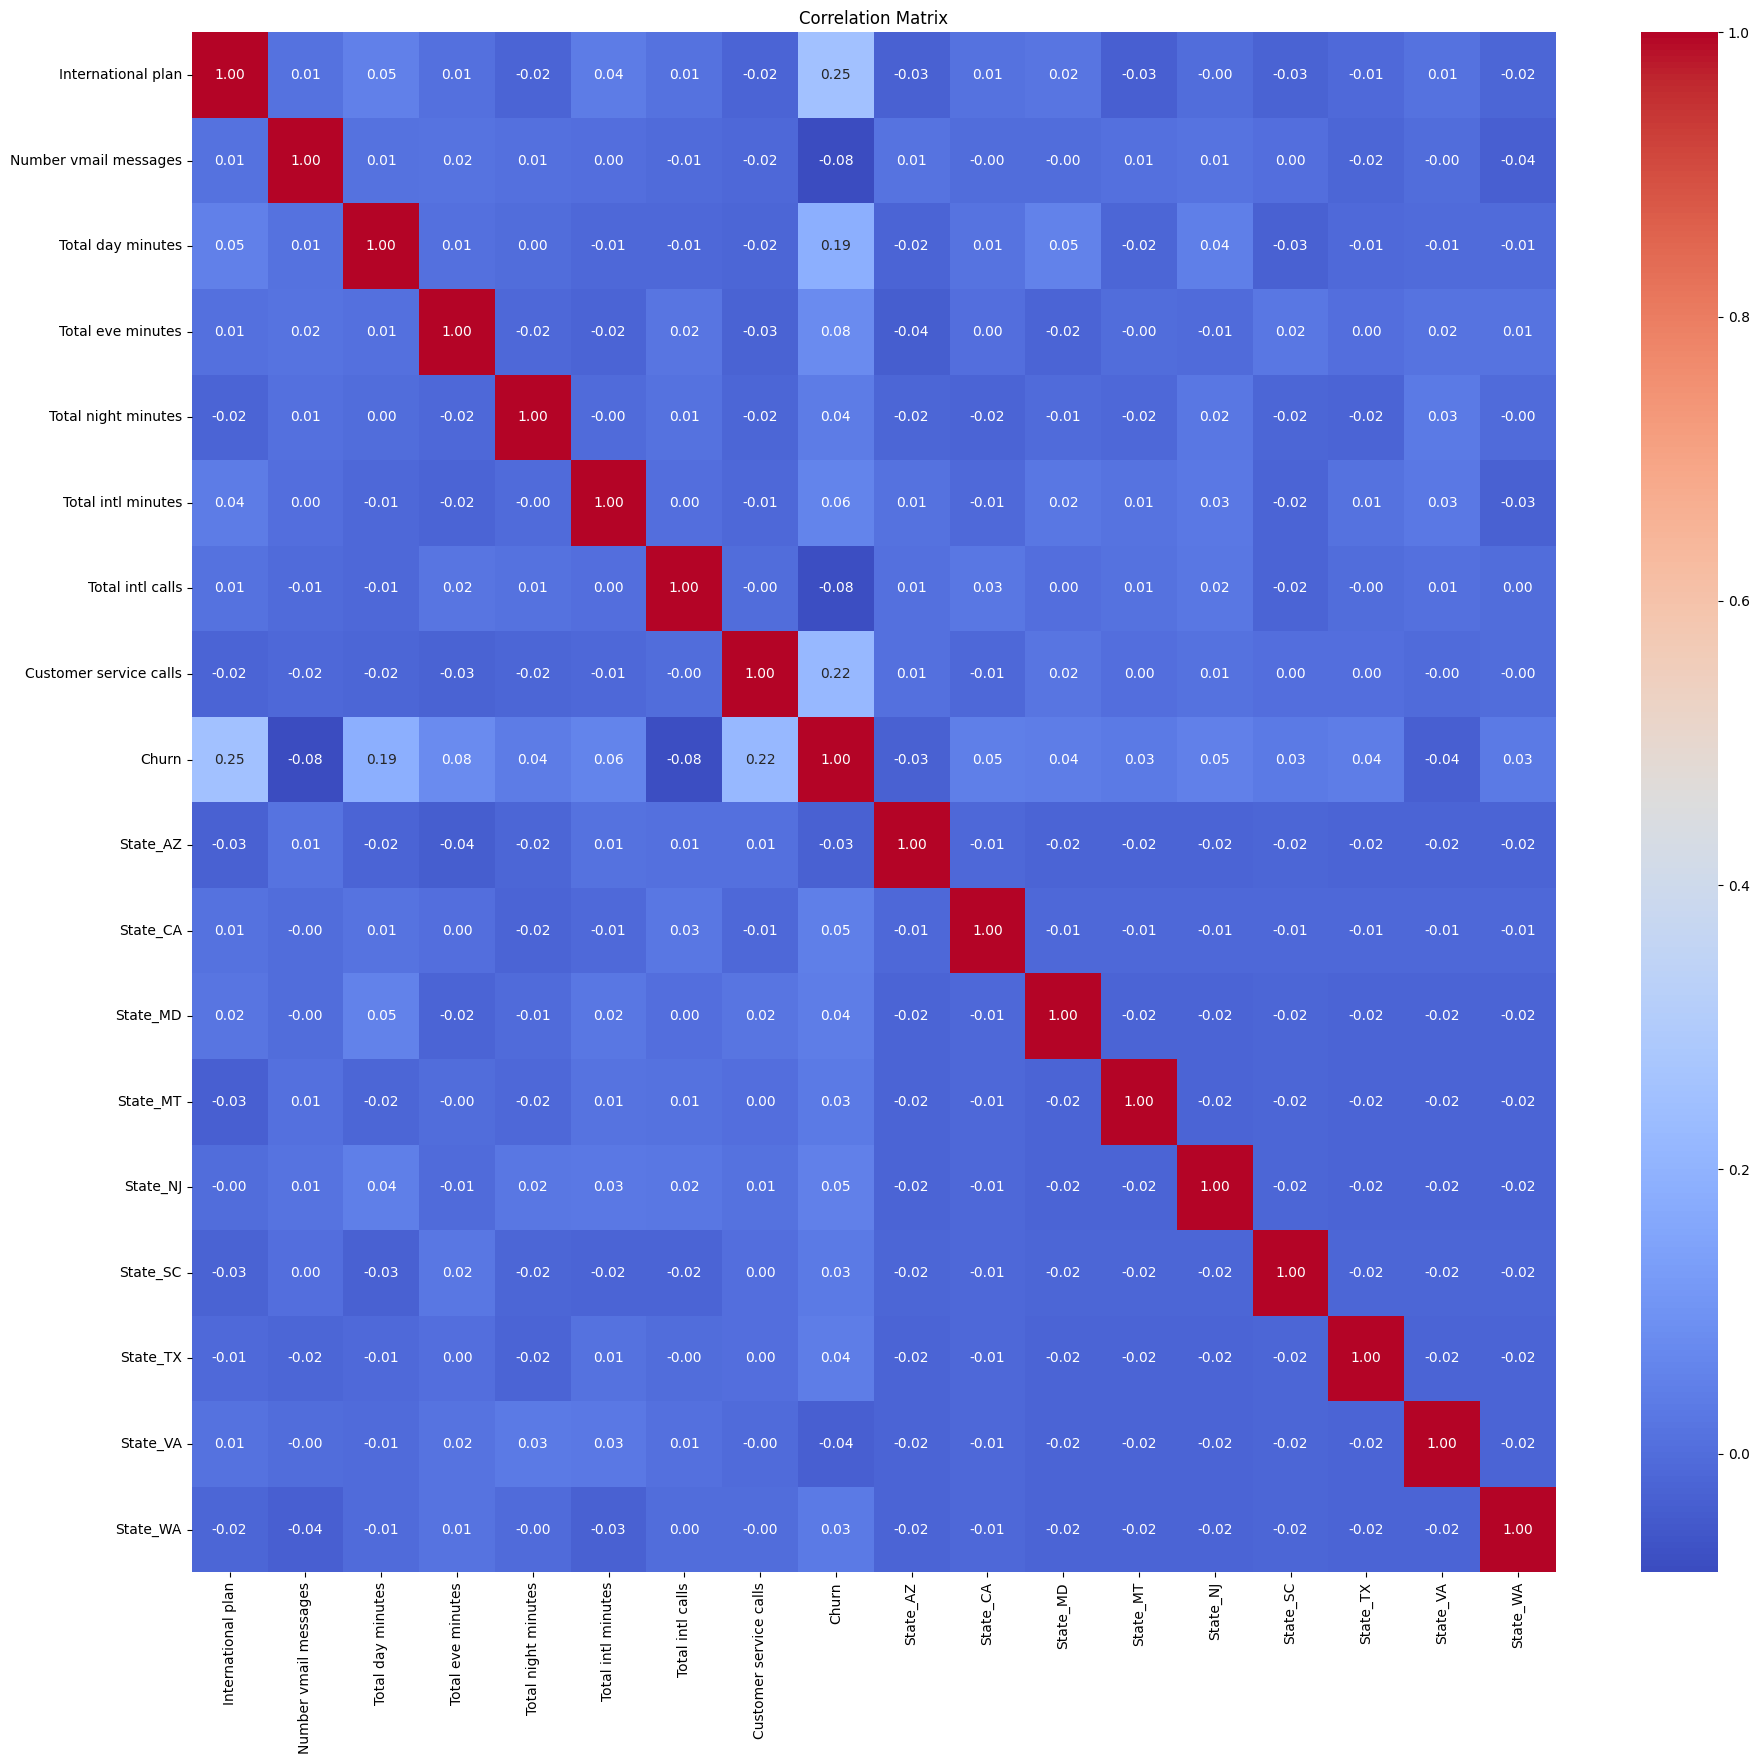

In [24]:
plt.figure(figsize=(22, 20))
correlation_matrix = combined_df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Data Balancing

### Testing

In [25]:
print(combined_df_cleaned['Churn'].value_counts())

Churn
0    2619
1     434
Name: count, dtype: int64


***The Churn Column is unbalanced***

### Balancing the Data Set

In [26]:
X = combined_df_cleaned.drop('Churn', axis=1)
y = combined_df_cleaned['Churn']

# Apply SMOTE for oversampling on the entire dataset (before splitting)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Apply Edited Nearest Neighbours for undersampling
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X_smote, y_smote)

# Split the resampled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Display the shape of the resulting splits
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (3810, 17), (3810,)
Testing set shape: (953, 17), (953,)


## Standardization

In [27]:
# Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## PCA

### Applying PCA

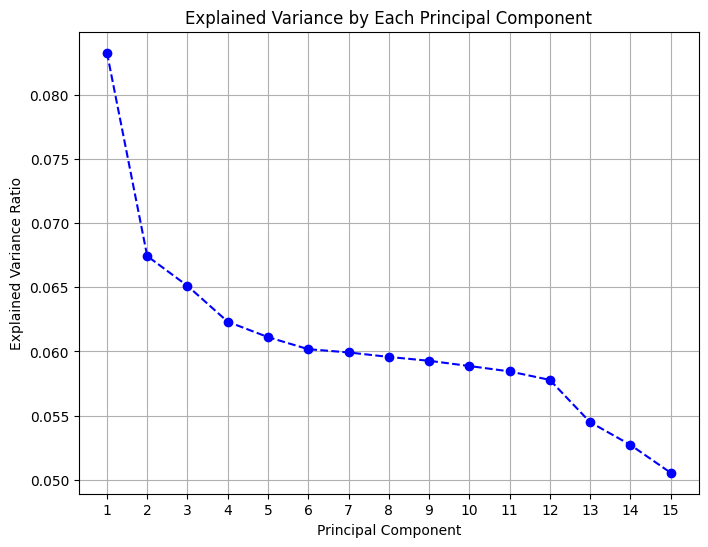

Number of variables left after PCA: 15


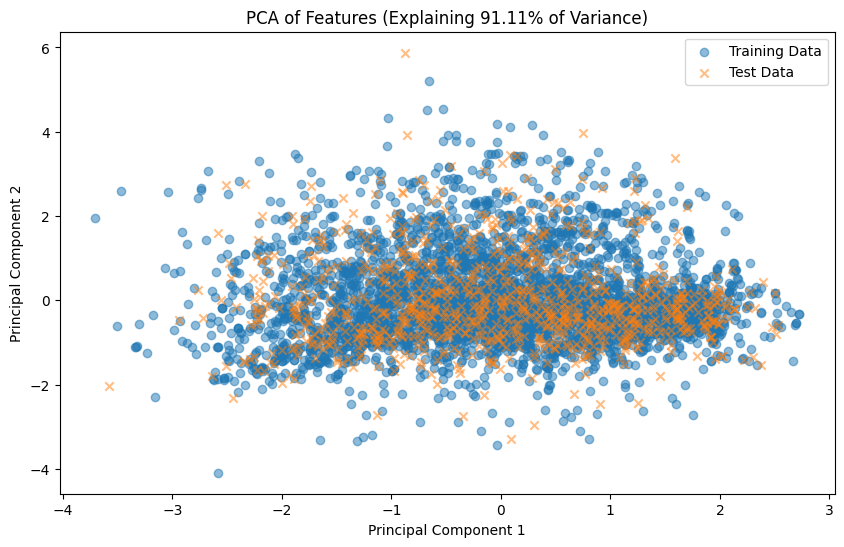

In [28]:
# PCA for dimensionality reduction (retain 80% of variance)
pca = PCA(n_components=0.9, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Variation Plot (Explained Variance Plot)
plt.figure(figsize=(8, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='b')
plt.title("Explained Variance by Each Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

# Display the number of variables (principal components) after PCA
print("Number of variables left after PCA:", pca.n_components_)

# Plot PCA results
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5, label='Training Data')

# Scatter plot for test data
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], alpha=0.5, label='Test Data', marker='x')

# Add title and labels
plt.title(f"PCA of Features (Explaining {round(pca.explained_variance_ratio_.sum() * 100, 2)}% of Variance)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


***We are left with 15 features***

### Quantitative Analysis and Visualization of Resampled Data


Feature Statistics Comparison:
                        Original Mean  Original Std  Resampled Mean  \
International plan           0.096299      0.295049        0.082931   
Number vmail messages        8.130691     13.714617        6.596683   
Total day minutes          179.869669     52.789826      193.681457   
Total eve minutes          201.093449     49.113342      206.475243   
Total night minutes        200.915427     48.695169      203.143923   
Total intl minutes          10.307632      2.586664       10.411056   
Total intl calls             4.298723      2.070637        4.023095   
Customer service calls       1.572879      1.325602        1.659458   
State_AZ                     0.019653      0.138827        0.012597   
State_CA                     0.009499      0.097014        0.005459   
State_MD                     0.021618      0.145457        0.013857   
State_MT                     0.021291      0.144375        0.013647   
State_NJ                     0.021618      0.

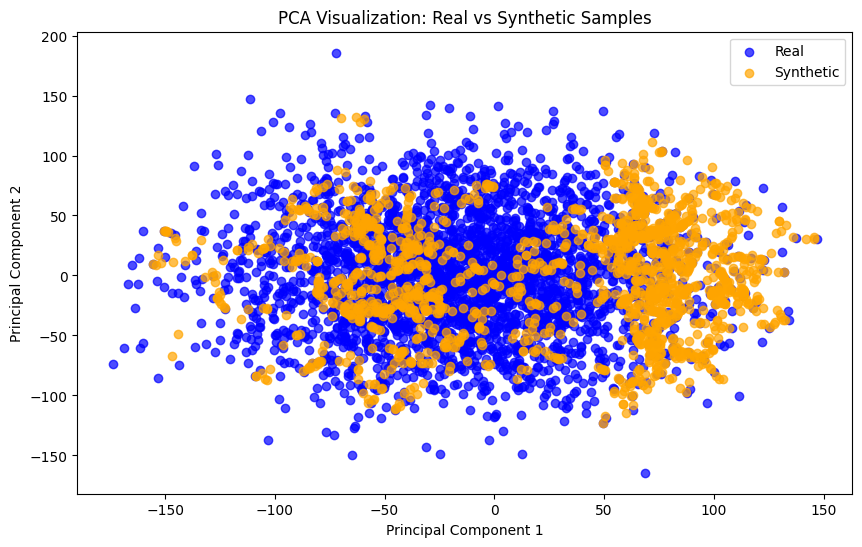

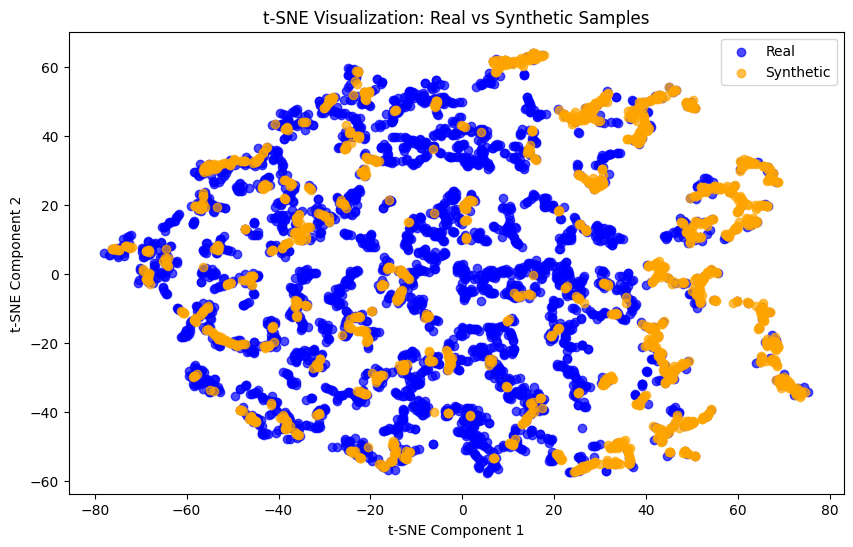

In [29]:
# Quantitative Comparison of Feature Distributions Before and After Resampling
feature_stats = pd.DataFrame({
    "Original Mean": X.mean(),
    "Original Std": X.std(),
    "Resampled Mean": X_resampled.mean(),
    "Resampled Std": X_resampled.std(),
})

print("\nFeature Statistics Comparison:")
print(feature_stats)

# PCA for Visualization of Real vs Synthetic Data
original_sample_count = len(X)
synthetic_sample_count = len(X_resampled) - original_sample_count
labels = ['Real'] * original_sample_count + ['Synthetic'] * synthetic_sample_count

# PCA Visualization
pca = PCA(n_components=2, random_state=42)
X_combined_pca = pca.fit_transform(np.vstack([X, X_resampled[original_sample_count:]]))

plt.figure(figsize=(10, 6))
for label, color in zip(['Real', 'Synthetic'], ['blue', 'orange']):
    indices = np.array(labels) == label
    plt.scatter(X_combined_pca[indices, 0], X_combined_pca[indices, 1], alpha=0.7, label=label, c=color)
plt.title("PCA Visualization: Real vs Synthetic Samples")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# t-SNE for Visualization of Real vs Synthetic Data
tsne = TSNE(n_components=2, random_state=42)
X_combined_tsne = tsne.fit_transform(np.vstack([X, X_resampled[original_sample_count:]]))

plt.figure(figsize=(10, 6))
for label, color in zip(['Real', 'Synthetic'], ['blue', 'orange']):
    indices = np.array(labels) == label
    plt.scatter(X_combined_tsne[indices, 0], X_combined_tsne[indices, 1], alpha=0.7, label=label, c=color)
plt.title("t-SNE Visualization: Real vs Synthetic Samples")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()





# **Modeling & Evaluation**


## Logistic Regression

Logistic Regression Accuracy: 0.7250786988457503
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       524
           1       0.70      0.68      0.69       429

    accuracy                           0.73       953
   macro avg       0.72      0.72      0.72       953
weighted avg       0.72      0.73      0.72       953



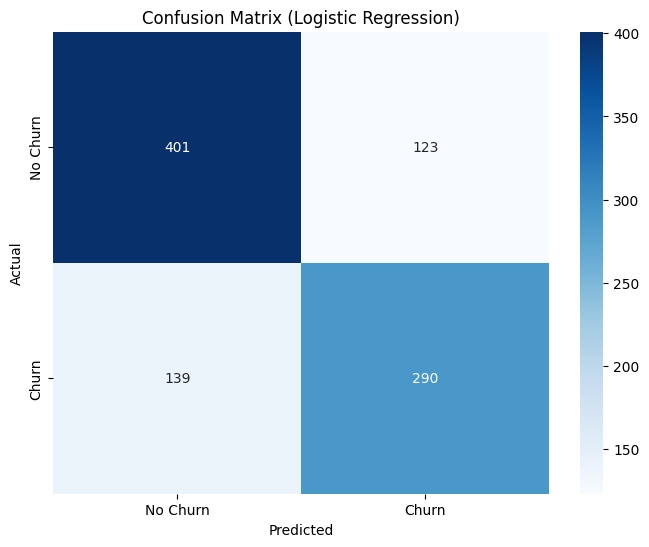

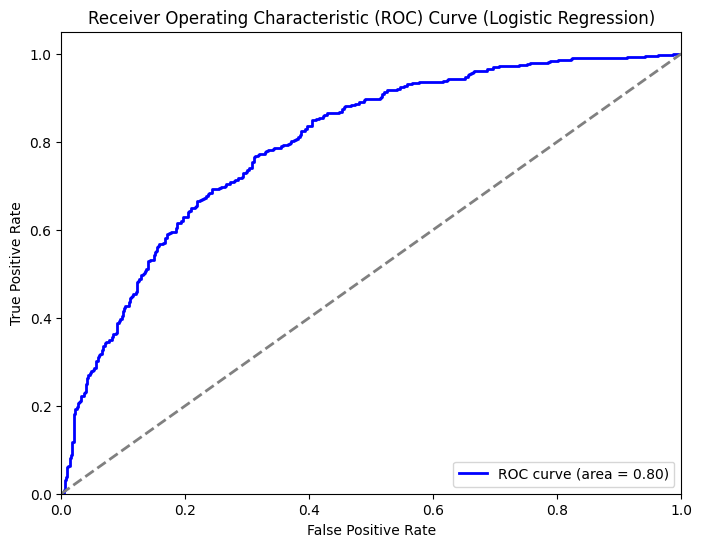

In [31]:
# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_lr = log_reg.predict(X_test_pca)
y_pred_proba_lr = log_reg.predict_proba(X_test_pca)[:, 1]

accuracy_logreg = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

# Generate and print the classification report
report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report (Logistic Regression):")
print(report_lr)

# Plot the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Plot the ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

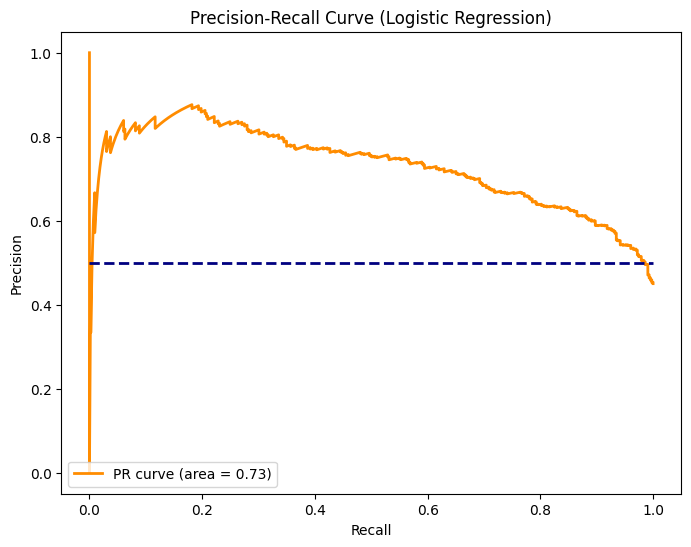

Area Under the Precision-Recall Curve (Logistic Regression): 0.73


In [32]:
# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_lr)

# Calculate the area under the precision-recall curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.plot([0, 1], [0.5, 0.5], color='navy', lw=2, linestyle='--')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Logistic Regression)')
plt.legend(loc="lower left")
plt.show()

print(f"Area Under the Precision-Recall Curve (Logistic Regression): {pr_auc:.2f}")

In [33]:
# Define the number of folds for k-fold cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
accuracy_scores = []
for train_index, val_index in kf.split(X_train_pca):
    X_train_fold, X_val_fold = X_train_pca[train_index], X_train_pca[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    log_reg = LogisticRegression(random_state=42, max_iter=1000)
    log_reg.fit(X_train_fold, y_train_fold)
    y_pred_fold = log_reg.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred_fold)
    accuracy_scores.append(accuracy)

print(f"Accuracy scores for each fold: {accuracy_scores}")
print(f"Average accuracy across all folds: {np.mean(accuracy_scores)}")
print(f"Standard deviation of accuracy across all folds: {np.std(accuracy_scores)}")

Accuracy scores for each fold: [0.7427821522309711, 0.7349081364829396, 0.7401574803149606, 0.7532808398950132, 0.7270341207349081, 0.7454068241469817, 0.7375328083989501, 0.7296587926509186, 0.7454068241469817, 0.7559055118110236]
Average accuracy across all folds: 0.7412073490813649
Standard deviation of accuracy across all folds: 0.008877445945032961


## SVM

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 300, 'gamma': 'auto', 'kernel': 'rbf'}
SVM Accuracy: 0.8772298006295908
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       524
           1       0.90      0.82      0.86       429

    accuracy                           0.88       953
   macro avg       0.88      0.87      0.87       953
weighted avg       0.88      0.88      0.88       953



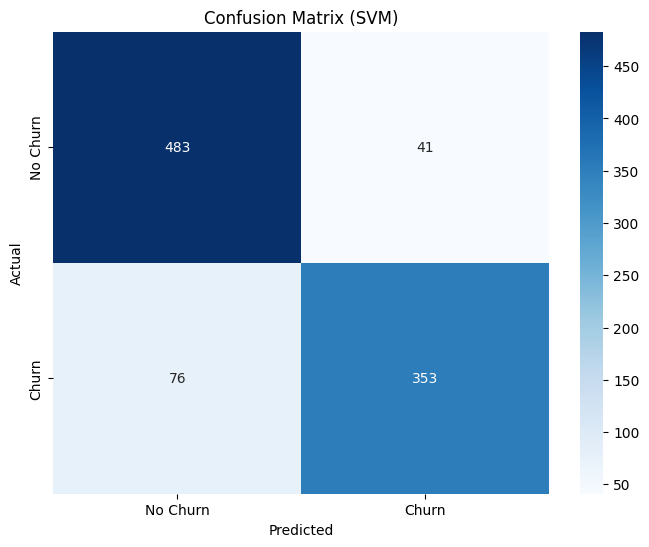

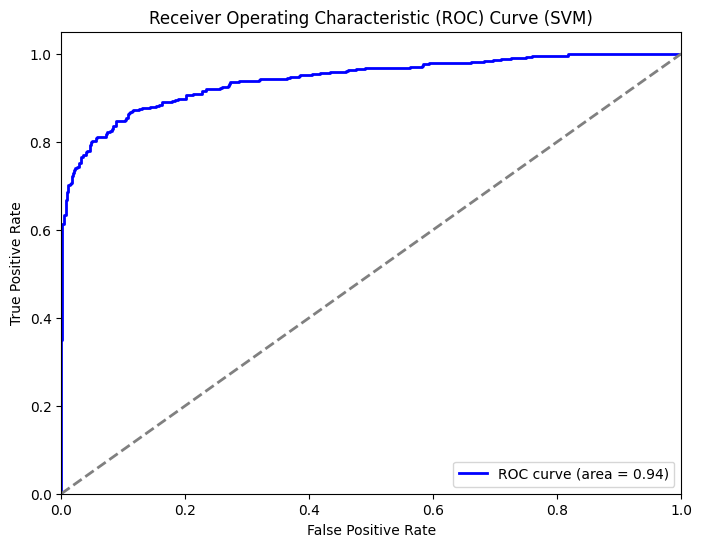

In [34]:
# Define the parameter grid for SVM
param_grid = {
   'C': [1, 10,50,100,200,300],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

# Create an SVM classifier
svm = SVC(probability=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

# Evaluate the best SVM model on the test set
y_pred_svm = best_svm.predict(X_test_pca)
y_pred_proba_svm = best_svm.predict_proba(X_test_pca)[:, 1]

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

# Generate and print the classification report
report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report (SVM):")
print(report_svm)

# Plot the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()

# Plot the ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)


plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM)')
plt.legend(loc="lower right")
plt.show()

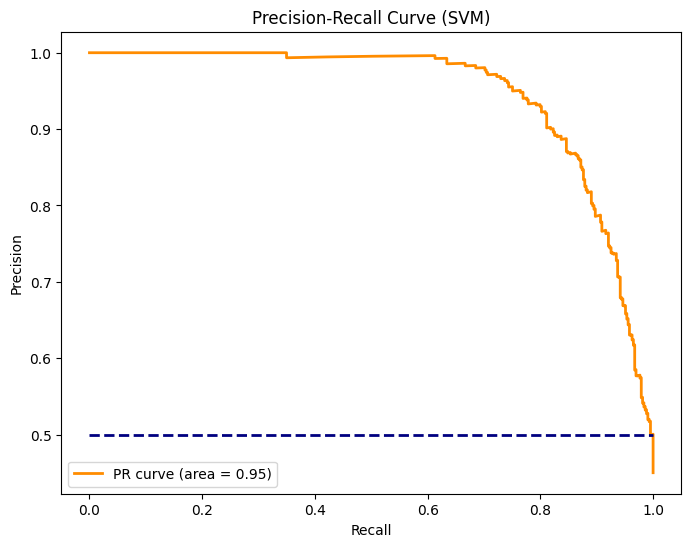

Area Under the Precision-Recall Curve (SVM): 0.95


In [ ]:
# Calculate precision-recall curve for SVM
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, y_pred_proba_svm)

# Calculate the area under the precision-recall curve
pr_auc_svm = auc(recall_svm, precision_svm)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc_svm:.2f})')
plt.plot([0, 1], [0.5, 0.5], color='navy', lw=2, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM)')
plt.legend(loc="lower left")
plt.show()

print(f"Area Under the Precision-Recall Curve (SVM): {pr_auc_svm:.2f}")

In [ ]:
# Define the number of folds for k-fold cross-validation
n_splits = 10  # 10-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42) # shuffle and set random_state for reproducibility

# Perform 10-fold cross-validation for SVM
accuracy_scores_svm = []
for train_index, val_index in kf.split(X_train_pca):
    X_train_fold, X_val_fold = X_train_pca[train_index], X_train_pca[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    svm = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], probability=True, random_state=42)
    svm.fit(X_train_fold, y_train_fold)
    y_pred_fold = svm.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred_fold)
    accuracy_scores_svm.append(accuracy)

print(f"SVM Accuracy scores for each fold: {accuracy_scores_svm}")
print(f"SVM Average accuracy across all folds: {np.mean(accuracy_scores_svm)}")
print(f"SVM Standard deviation of accuracy across all folds: {np.std(accuracy_scores_svm)}")

SVM Accuracy scores for each fold: [0.8818897637795275, 0.916010498687664, 0.8740157480314961, 0.8871391076115486, 0.8556430446194225, 0.8871391076115486, 0.8871391076115486, 0.8818897637795275, 0.8766404199475065, 0.8740157480314961]
SVM Average accuracy across all folds: 0.8821522309711286
SVM Standard deviation of accuracy across all folds: 0.014445236646527058


## Decision tree

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Accuracy: 0.8467995802728226
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       524
           1       0.84      0.81      0.83       429

    accuracy                           0.85       953
   macro avg       0.85      0.84      0.84       953
weighted avg       0.85      0.85      0.85       953



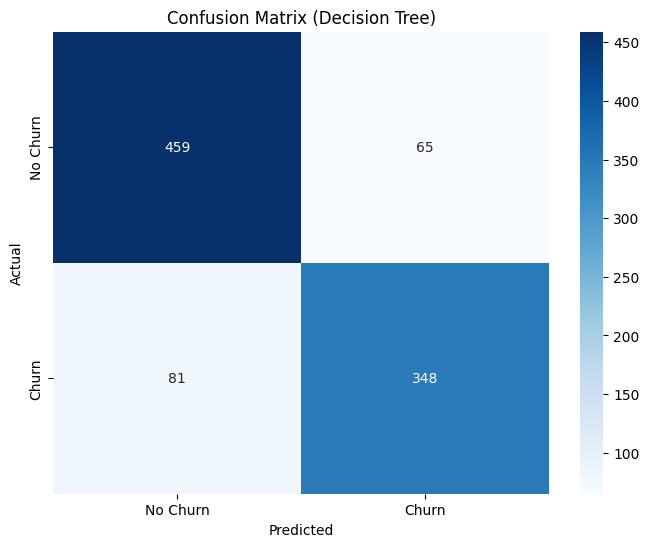

In [35]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


# Fit the grid search to the data
grid_search_dt.fit(X_train_pca, y_train)

# Get the best parameters and the best estimator
best_params_dt = grid_search_dt.best_params_
best_dt = grid_search_dt.best_estimator_

print(f"Best parameters for Decision Tree: {best_params_dt}")

# Evaluate the best Decision Tree model on the test set
y_pred_dt = best_dt.predict(X_test_pca)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Generate and print the classification report
report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report (Decision Tree):")
print(report_dt)

#Plot the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

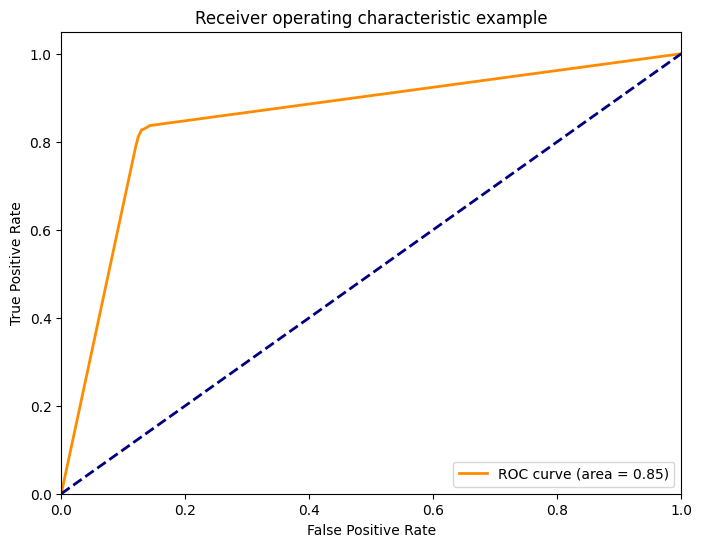

In [36]:
# Predict probabilities for the positive class
y_pred_proba_dt = best_dt.predict_proba(X_test_pca)[:, 1]

# Compute ROC curve and ROC area for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [37]:
# Define the number of folds for k-fold cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform 10-fold cross-validation for Decision Tree
accuracy_scores_dt = []
for train_index, val_index in kf.split(X_train_pca):
    X_train_fold, X_val_fold = X_train_pca[train_index], X_train_pca[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    dt = DecisionTreeClassifier(**best_params_dt, random_state=42)
    dt.fit(X_train_fold, y_train_fold)
    y_pred_fold = dt.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred_fold)
    accuracy_scores_dt.append(accuracy)

print(f"Decision Tree Accuracy scores for each fold: {accuracy_scores_dt}")
print(f"Decision Tree Average accuracy across all folds: {np.mean(accuracy_scores_dt)}")
print(f"Decision Tree Standard deviation of accuracy across all folds: {np.std(accuracy_scores_dt)}")

Decision Tree Accuracy scores for each fold: [0.8241469816272966, 0.8372703412073491, 0.8372703412073491, 0.821522309711286, 0.7952755905511811, 0.8451443569553806, 0.8031496062992126, 0.8320209973753281, 0.8556430446194225, 0.8188976377952756]
Decision Tree Average accuracy across all folds: 0.827034120734908
Decision Tree Standard deviation of accuracy across all folds: 0.01750677810567169


## random forest

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.8908709338929696
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       524
           1       0.92      0.83      0.87       429

    accuracy                           0.89       953
   macro avg       0.90      0.89      0.89       953
weighted avg       0.89      0.89      0.89       953



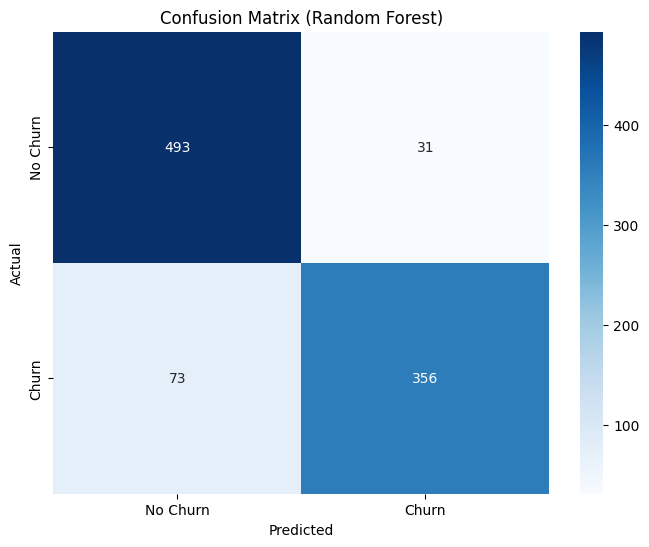

In [38]:
# Define the parameter grid for Random Forest
param_grid_rf = {
   "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search_rf.fit(X_train_pca, y_train)

# Get the best parameters and the best estimator
best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

print(f"Best parameters for Random Forest: {best_params_rf}")

# Evaluate the best Random Forest model on the test set
y_pred_rf = best_rf.predict(X_test_pca)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Generate and print the classification report
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report (Random Forest):")
print(report_rf)

# Plot the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

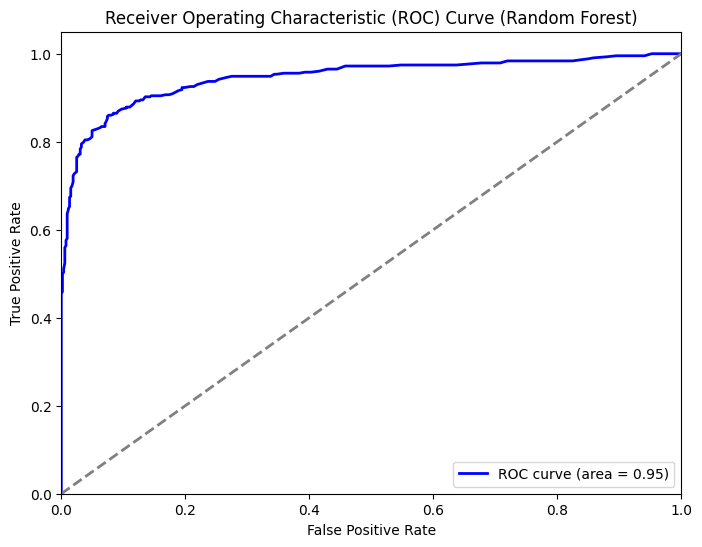

In [39]:

y_pred_proba_rf = best_rf.predict_proba(X_test_pca)[:, 1]

# Plot the ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()

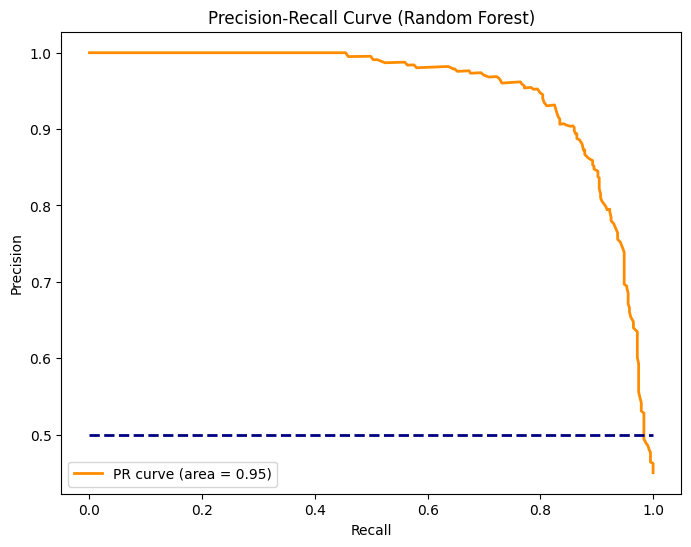

Area Under the Precision-Recall Curve (Random Forest): 0.95


In [40]:
# Calculate precision-recall curve for Random Forest
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred_proba_rf)

# Calculate the area under the precision-recall curve
pr_auc_rf = auc(recall_rf, precision_rf)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc_rf:.2f})')
plt.plot([0, 1], [0.5, 0.5], color='navy', lw=2, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.legend(loc="lower left")
plt.show()

print(f"Area Under the Precision-Recall Curve (Random Forest): {pr_auc_rf:.2f}")

In [41]:
# Define the number of folds for k-fold cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform 10-fold cross-validation for Random Forest
accuracy_scores_rf = []
for train_index, val_index in kf.split(X_train_pca):
    X_train_fold, X_val_fold = X_train_pca[train_index], X_train_pca[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    rf = RandomForestClassifier(**best_params_rf, random_state=42)
    rf.fit(X_train_fold, y_train_fold)
    y_pred_fold = rf.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred_fold)
    accuracy_scores_rf.append(accuracy)

print(f"Random Forest Accuracy scores for each fold: {accuracy_scores_rf}")
print(f"Random Forest Average accuracy across all folds: {np.mean(accuracy_scores_rf)}")
print(f"Random Forest Standard deviation of accuracy across all folds: {np.std(accuracy_scores_rf)}")

Random Forest Accuracy scores for each fold: [0.905511811023622, 0.9002624671916011, 0.89501312335958, 0.9212598425196851, 0.863517060367454, 0.9133858267716536, 0.9238845144356955, 0.8713910761154856, 0.8766404199475065, 0.8766404199475065]
Random Forest Average accuracy across all folds: 0.894750656167979
Random Forest Standard deviation of accuracy across all folds: 0.0205480131507085


## GBM

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for GBM: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
GBM Accuracy: 0.8961175236096537
Classification Report (GBM):
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       524
           1       0.91      0.85      0.88       429

    accuracy                           0.90       953
   macro avg       0.90      0.89      0.89       953
weighted avg       0.90      0.90      0.90       953



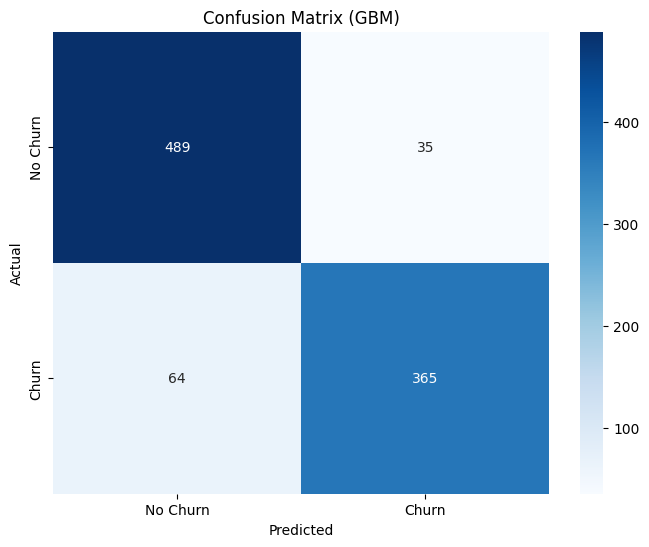

In [42]:
# Define the parameter grid for Gradient Boosting
param_grid_gbm = {
    "n_estimators": [100, 200, 300],  # Number of trees in the forest
    "learning_rate": [0.01, 0.1, 0.2],  # Step size to shrink the update
    "max_depth": [3, 5, 7]  # Maximum depth of the tree
}

# Create a Gradient Boosting Classifier
gbm_classifier = GradientBoostingClassifier(random_state=42)

# Create a GridSearchCV object for Gradient Boosting
grid_search_gbm = GridSearchCV(estimator=gbm_classifier, param_grid=param_grid_gbm, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search_gbm.fit(X_train_pca, y_train)

# Get the best parameters and the best estimator
best_params_gbm = grid_search_gbm.best_params_
best_gbm = grid_search_gbm.best_estimator_

print(f"Best parameters for GBM: {best_params_gbm}")

# Evaluate the best GBM model on the test set
y_pred_gbm = best_gbm.predict(X_test_pca)

accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f"GBM Accuracy: {accuracy_gbm}")

# Generate and print the classification report
report_gbm = classification_report(y_test, y_pred_gbm)
print("Classification Report (GBM):")
print(report_gbm)

# Plot the confusion matrix
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (GBM)')
plt.show()

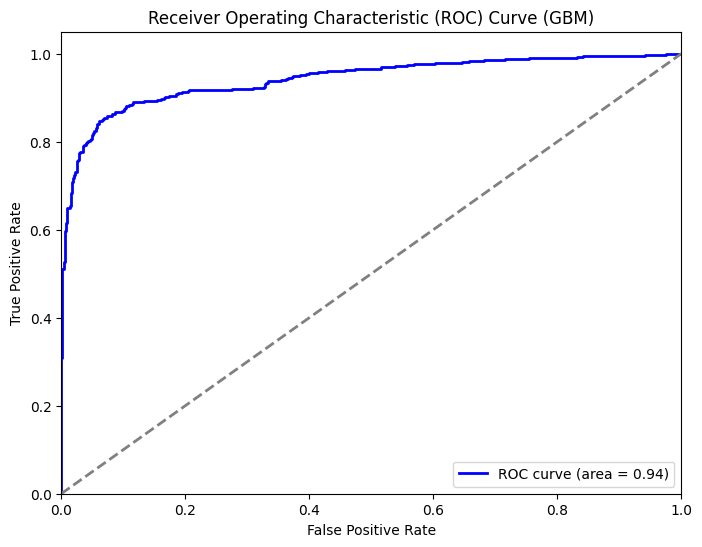

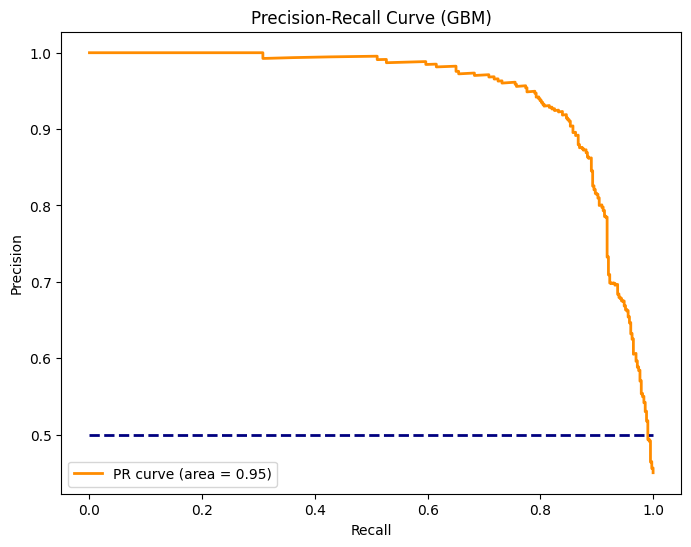

Area Under the Precision-Recall Curve (GBM): 0.95


In [43]:
# Assuming X_test_pca and y_test are defined from previous code
y_pred_proba_gbm = best_gbm.predict_proba(X_test_pca)[:, 1]

# Plot the ROC curve
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_pred_proba_gbm)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gbm, tpr_gbm, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_gbm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (GBM)')
plt.legend(loc="lower right")
plt.show()

# Calculate precision-recall curve for GBM
precision_gbm, recall_gbm, thresholds_gbm = precision_recall_curve(y_test, y_pred_proba_gbm)

# Calculate the area under the precision-recall curve
pr_auc_gbm = auc(recall_gbm, precision_gbm)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_gbm, precision_gbm, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc_gbm:.2f})')
plt.plot([0, 1], [0.5, 0.5], color='navy', lw=2, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (GBM)')
plt.legend(loc="lower left")
plt.show()

print(f"Area Under the Precision-Recall Curve (GBM): {pr_auc_gbm:.2f}")

In [44]:
# Define the number of folds for k-fold cross-validation
n_splits = 10  # 10-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform 10-fold cross-validation for GBM
accuracy_scores_gbm = []
for train_index, val_index in kf.split(X_train_pca):
    X_train_fold, X_val_fold = X_train_pca[train_index], X_train_pca[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    gbm = GradientBoostingClassifier(**best_params_gbm, random_state=42)
    gbm.fit(X_train_fold, y_train_fold)
    y_pred_fold = gbm.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred_fold)
    accuracy_scores_gbm.append(accuracy)

print(f"GBM Accuracy scores for each fold: {accuracy_scores_gbm}")
print(f"GBM Average accuracy across all folds: {np.mean(accuracy_scores_gbm)}")
print(f"GBM Standard deviation of accuracy across all folds: {np.std(accuracy_scores_gbm)}")

GBM Accuracy scores for each fold: [0.8976377952755905, 0.910761154855643, 0.8871391076115486, 0.926509186351706, 0.8530183727034121, 0.8923884514435696, 0.9238845144356955, 0.8661417322834646, 0.863517060367454, 0.8530183727034121]
GBM Average accuracy across all folds: 0.8874015748031494
GBM Standard deviation of accuracy across all folds: 0.026310945041486098





## XGBoost

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\Nassi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:17:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
XGBoost Accuracy: 0.8982161594963274
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       524
           1       0.92      0.85      0.88       429

    accuracy                           0.90       953
   macro avg       0.90      0.89      0.90       953
weighted avg       0.90      0.90      0.90       953



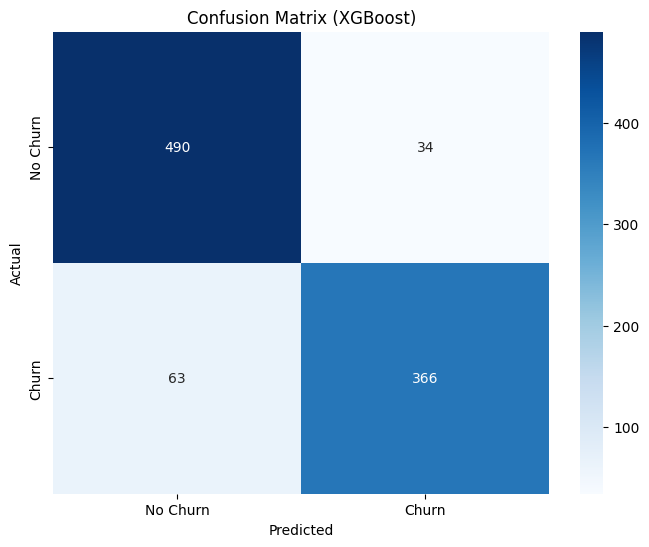

In [45]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') #eval_metric='logloss'

# Create a GridSearchCV object for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search_xgb.fit(X_train_pca, y_train)

# Get the best parameters and the best estimator
best_params_xgb = grid_search_xgb.best_params_
best_xgb = grid_search_xgb.best_estimator_

print(f"Best parameters for XGBoost: {best_params_xgb}")

# Evaluate the best XGBoost model on the test set
y_pred_xgb = best_xgb.predict(X_test_pca)
y_pred_proba_xgb = best_xgb.predict_proba(X_test_pca)[:, 1]


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

# Generate and print the classification report
report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report (XGBoost):")
print(report_xgb)

#Plot the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

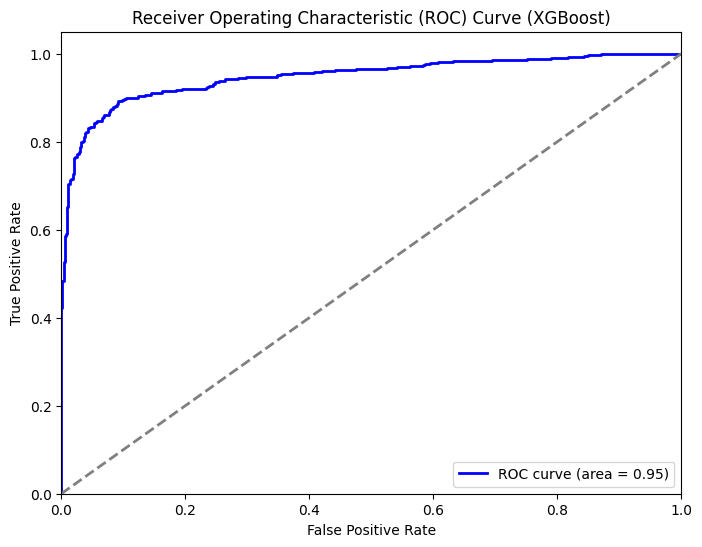

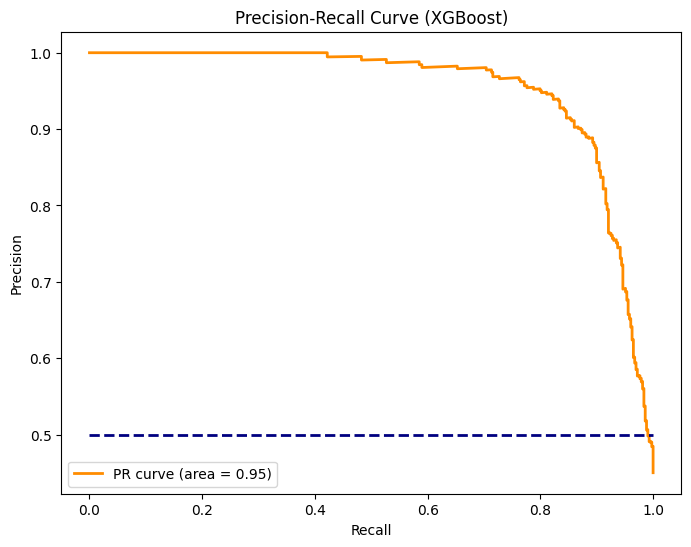

Area Under the Precision-Recall Curve (XGBoost): 0.95


In [46]:
# Plot the ROC curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (XGBoost)')
plt.legend(loc="lower right")
plt.show()

# Calculate precision-recall curve for XGBoost
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, y_pred_proba_xgb)

# Calculate the area under the precision-recall curve
pr_auc_xgb = auc(recall_xgb, precision_xgb)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc_xgb:.2f})')
plt.plot([0, 1], [0.5, 0.5], color='navy', lw=2, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost)')
plt.legend(loc="lower left")
plt.show()

print(f"Area Under the Precision-Recall Curve (XGBoost): {pr_auc_xgb:.2f}")

In [47]:
# Define the number of folds for k-fold cross-validation
n_splits = 10  # 10-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform 10-fold cross-validation for XGBoost
accuracy_scores_xgb = []
for train_index, val_index in kf.split(X_train_pca):
    X_train_fold, X_val_fold = X_train_pca[train_index], X_train_pca[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    xgb = XGBClassifier(**best_params_xgb, random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train_fold, y_train_fold)
    y_pred_fold = xgb.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred_fold)
    accuracy_scores_xgb.append(accuracy)

print(f"XGBoost Accuracy scores for each fold: {accuracy_scores_xgb}")
print(f"XGBoost Average accuracy across all folds: {np.mean(accuracy_scores_xgb)}")
print(f"XGBoost Standard deviation of accuracy across all folds: {np.std(accuracy_scores_xgb)}")

C:\Users\Nassi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:17:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Nassi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:17:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Nassi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarnin

XGBoost Accuracy scores for each fold: [0.905511811023622, 0.9291338582677166, 0.8871391076115486, 0.905511811023622, 0.868766404199475, 0.905511811023622, 0.9186351706036745, 0.8818897637795275, 0.8740157480314961, 0.8792650918635171]
XGBoost Average accuracy across all folds: 0.8955380577427823
XGBoost Standard deviation of accuracy across all folds: 0.01913672035019231


## Model Comparison

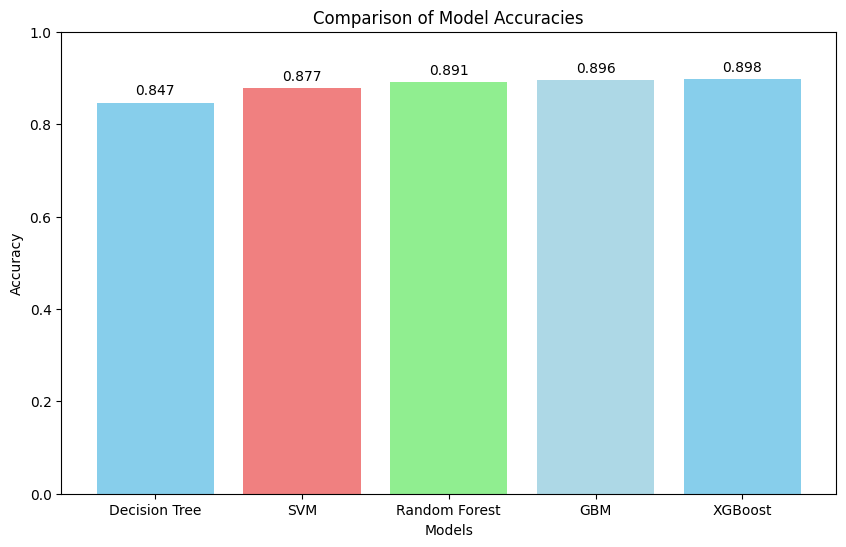

In [ ]:
models = ['Decision Tree', 'SVM', 'Random Forest', 'GBM', 'XGBoost' ]
accuracies = [accuracy_dt, accuracy_svm, accuracy_rf, accuracy_gbm, accuracy_xgb]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue', 'skyblue'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
plt.show()

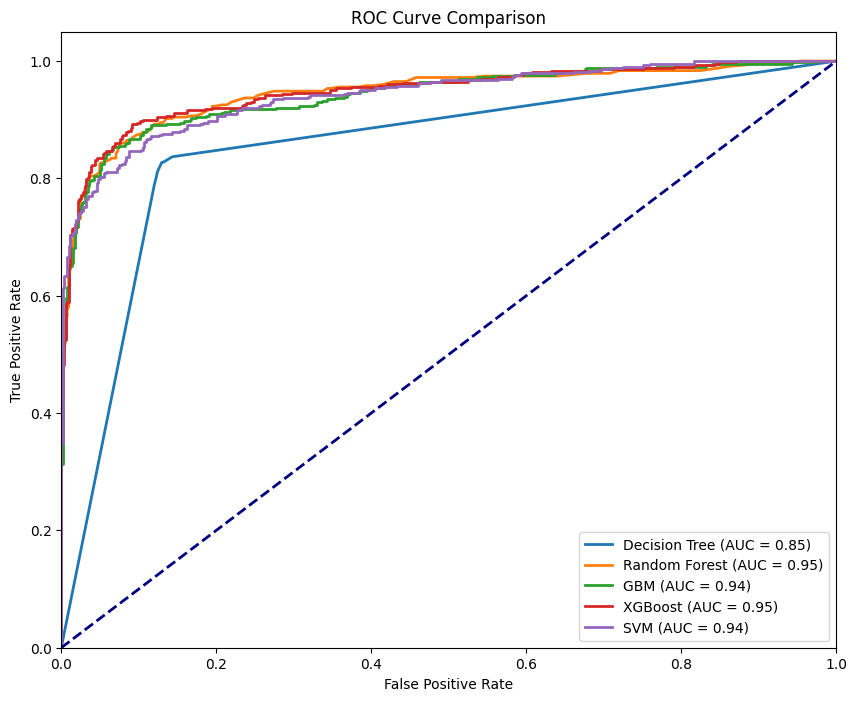

In [ ]:
plt.figure(figsize=(10, 8))

# Plot ROC curves for each model
plt.plot(fpr_dt, tpr_dt, lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gbm, tpr_gbm, lw=2, label=f'GBM (AUC = {roc_auc_gbm:.2f})')
plt.plot(fpr_xgb, tpr_xgb, lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
try:
    plt.plot(fpr_svm, tpr_svm, lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
except NameError:
    print("SVM results not found. Make sure SVM model is trained and its ROC curve is calculated.")

# Add labels and title
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

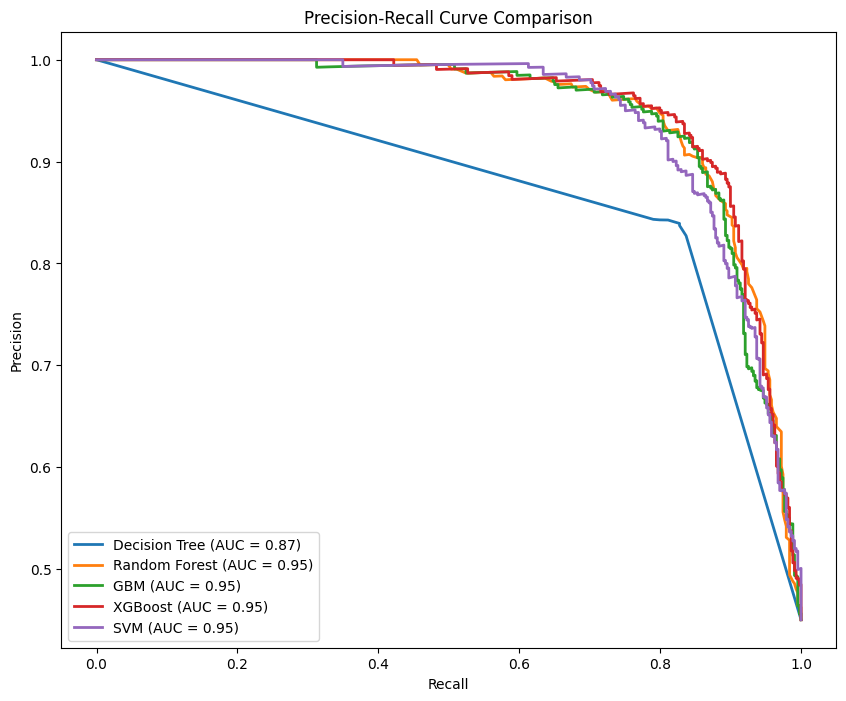

In [ ]:
models = {
    'Decision Tree': (y_test, y_pred_proba_dt),
    'Random Forest': (y_test, y_pred_proba_rf),
    'GBM': (y_test, y_pred_proba_gbm),
    'XGBoost': (y_test, y_pred_proba_xgb),
}

try:
    models['SVM'] = (y_test, y_pred_proba_svm)
except NameError:
    print("SVM results not found. Make sure SVM model is trained and its predict_proba is available.")


plt.figure(figsize=(10, 8))

for model_name, (y_true, y_scores) in models.items():
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, lw=2, label=f'{model_name} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc="lower left")
plt.show()

In [ ]:
from scipy.stats import wilcoxon
statistic_gbm_vs_rf, pvalue_gbm_vs_rf = wilcoxon(accuracy_scores_gbm, accuracy_scores_rf)
statistic_gbm_vs_dt, pvalue_gbm_vs_dt = wilcoxon(accuracy_scores_gbm, accuracy_scores_dt)
statistic_gbm_vs_svm, pvalue_gbm_vs_svm = wilcoxon(accuracy_scores_gbm, accuracy_scores_svm)
statistic_gbm_vs_xgb, pvalue_gbm_vs_xgb = wilcoxon(accuracy_scores_gbm, accuracy_scores_xgb)


print(f"Wilcoxon test (GBM vs. Random Forest): Statistic={statistic_gbm_vs_rf:.3f}, p-value={pvalue_gbm_vs_rf:.3f}")
print(f"Wilcoxon test (GBM vs. Decision Tree): Statistic={statistic_gbm_vs_dt:.3f}, p-value={pvalue_gbm_vs_dt:.3f}")
print(f"Wilcoxon test (GBM vs. SVM): Statistic={statistic_gbm_vs_svm:.3f}, p-value={pvalue_gbm_vs_svm:.3f}")
print(f"Wilcoxon test (GBM vs. XGBoost): Statistic={statistic_gbm_vs_xgb:.3f}, p-value={pvalue_gbm_vs_xgb:.3f}")

alpha = 0.05

# Compare p-values to the significance level and print results
print("\nModel Comparison Results:")
if pvalue_gbm_vs_rf < alpha:
    print("GBM and Random Forest have statistically significant different performances.")
else:
    print("GBM and Random Forest have similar performances.")

if pvalue_gbm_vs_dt < alpha:
    print("GBM and Decision Tree have statistically significant different performances.")
else:
    print("GBM and Decision Tree have similar performances.")

if pvalue_gbm_vs_svm < alpha:
    print("GBM and SVM have statistically significant different performances.")
else:
    print("GBM and SVM have similar performances.")

if pvalue_gbm_vs_xgb < alpha:
    print("GBM and XGBoost have statistically significant different performances.")
else:
    print("GBM and XGBoost have similar performances.")

Wilcoxon test (GBM vs. Random Forest): Statistic=9.500, p-value=0.120
Wilcoxon test (GBM vs. Decision Tree): Statistic=0.000, p-value=0.002
Wilcoxon test (GBM vs. SVM): Statistic=17.500, p-value=0.553
Wilcoxon test (GBM vs. XGBoost): Statistic=9.500, p-value=0.123

Model Comparison Results:
GBM and Random Forest have similar performances.
GBM and Decision Tree have statistically significant different performances.
GBM and SVM have similar performances.
GBM and XGBoost have similar performances.


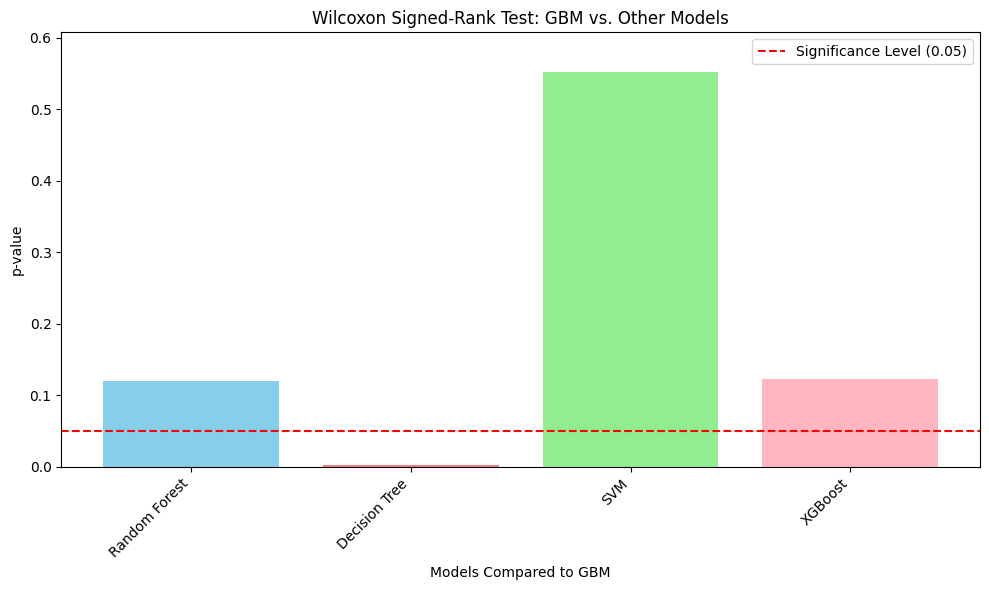

In [ ]:
models = ['Random Forest', 'Decision Tree', 'SVM', 'XGBoost']
p_values = [pvalue_gbm_vs_rf, pvalue_gbm_vs_dt, pvalue_gbm_vs_svm, pvalue_gbm_vs_xgb]

plt.figure(figsize=(10, 6))
plt.bar(models, p_values, color=['skyblue', 'lightcoral', 'lightgreen', 'lightpink'])
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)') # Add significance level line

plt.xlabel('Models Compared to GBM')
plt.ylabel('p-value')
plt.title('Wilcoxon Signed-Rank Test: GBM vs. Other Models')
plt.ylim(0, max(p_values) * 1.1) # Adjust ylim for better visualization
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

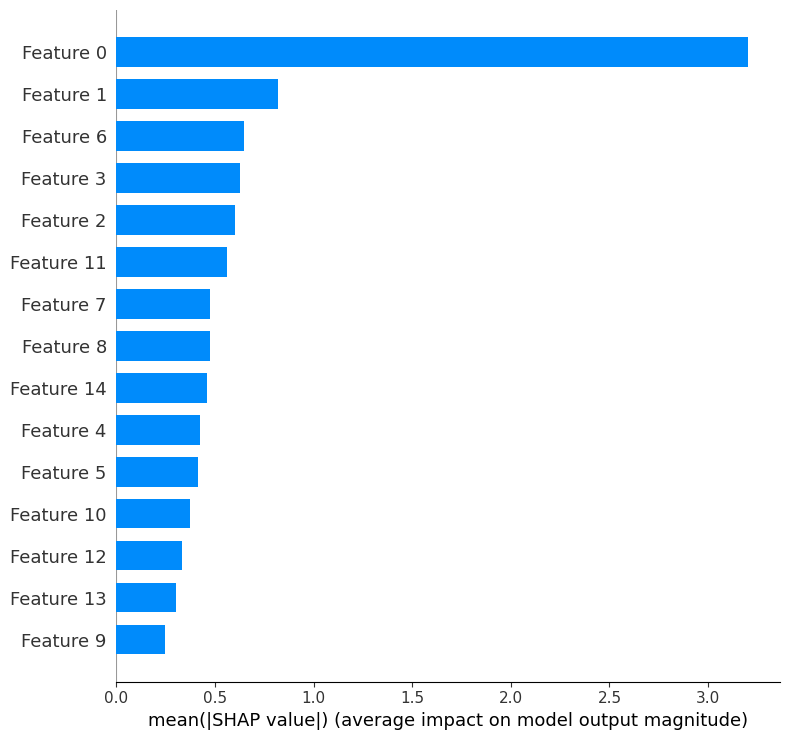

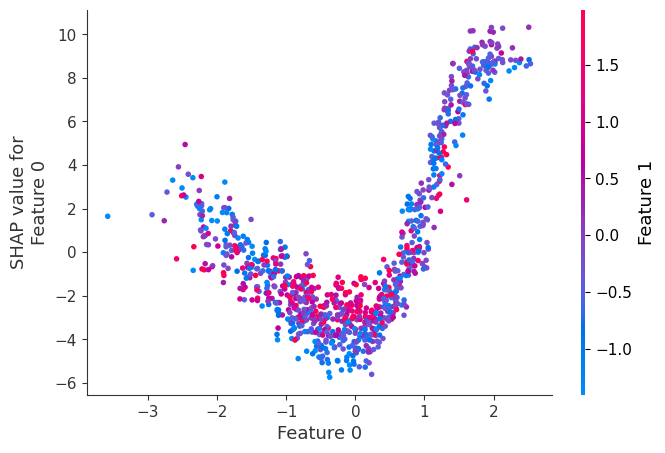

In [ ]:
import shap

# Calculate SHAP values
explainer = shap.TreeExplainer(best_gbm)
shap_values = explainer.shap_values(X_test_pca)

# Vérifier la structure de shap_values
if isinstance(shap_values, list):  # Si shap_values est une liste (classification binaire)
    shap_values_class = shap_values[1]  # Pour la classe positive
else:  # Si shap_values est une matrice unique
    shap_values_class = shap_values

# Global interpretation: Summary plot
shap.summary_plot(shap_values_class, X_test_pca, plot_type="bar")

# Global interpretation: Dependence plot (example with feature 0)
shap.dependence_plot(0, shap_values_class, X_test_pca)

# Local interpretation: Force plot pour une instance spécifique
shap.force_plot(explainer.expected_value, shap_values_class[0, :], X_test_pca[0, :])

# Local interpretation: Force plots pour toutes les instances (boucle)
for i in range(len(X_test_pca)):
    shap.force_plot(explainer.expected_value, shap_values_class[i, :], X_test_pca[i, :])



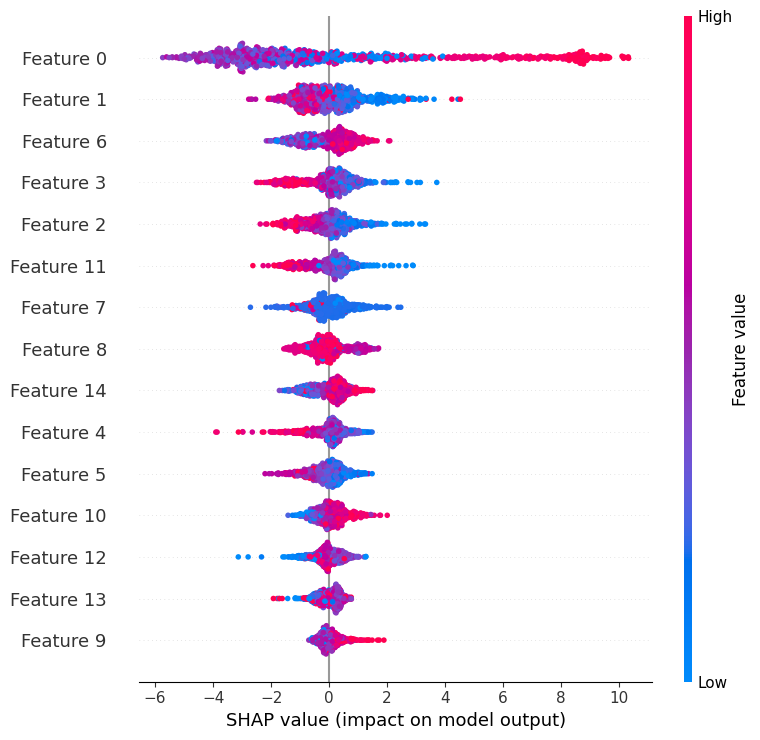

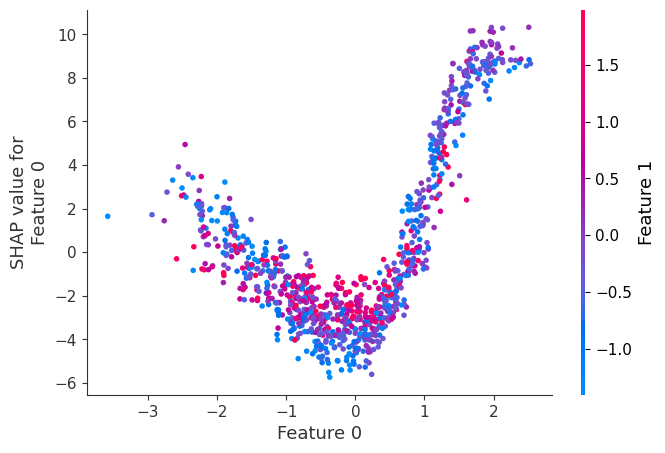

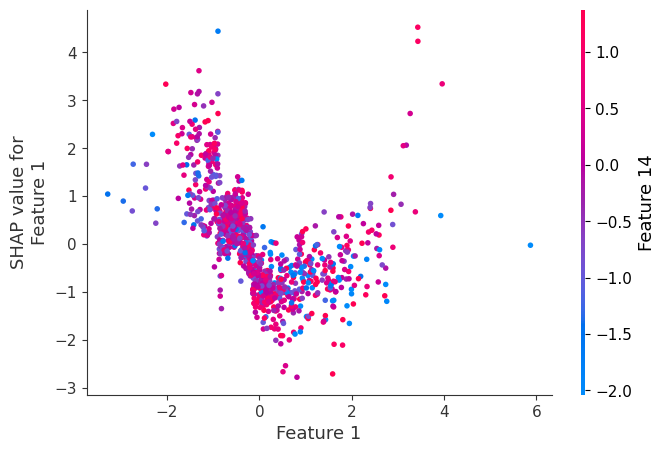

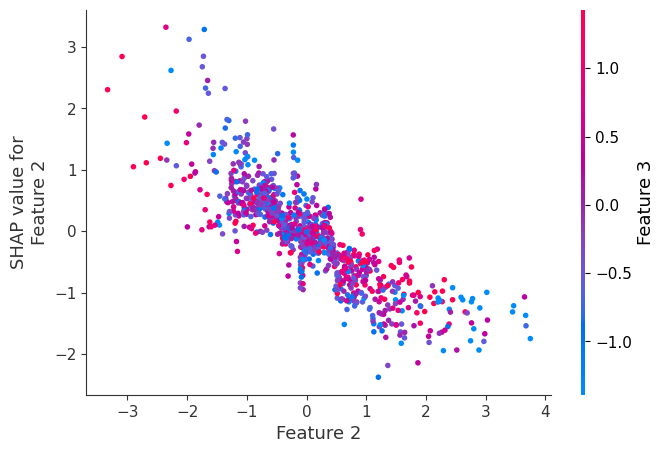

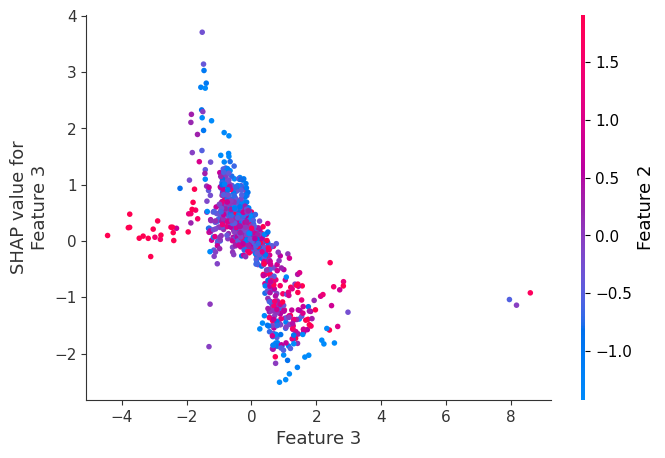

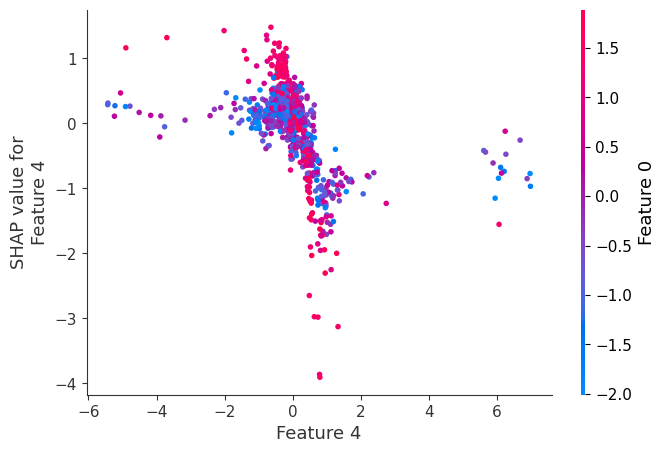

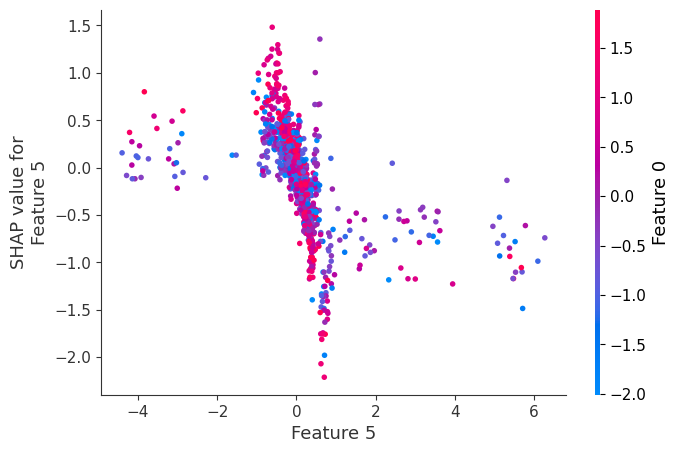

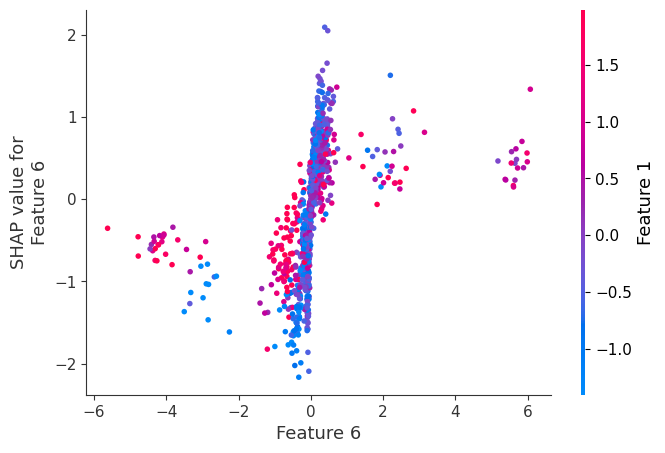

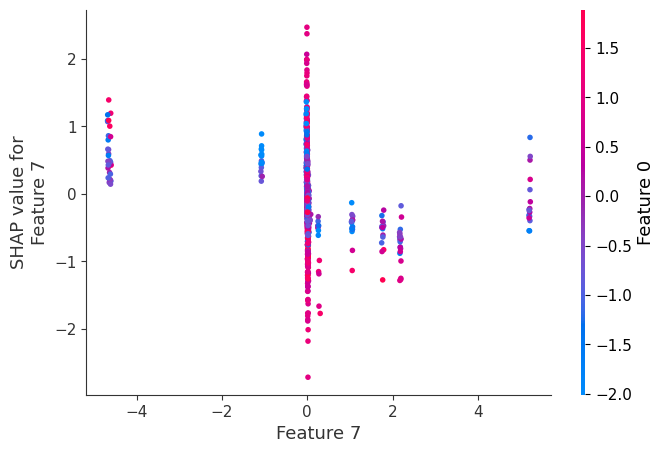

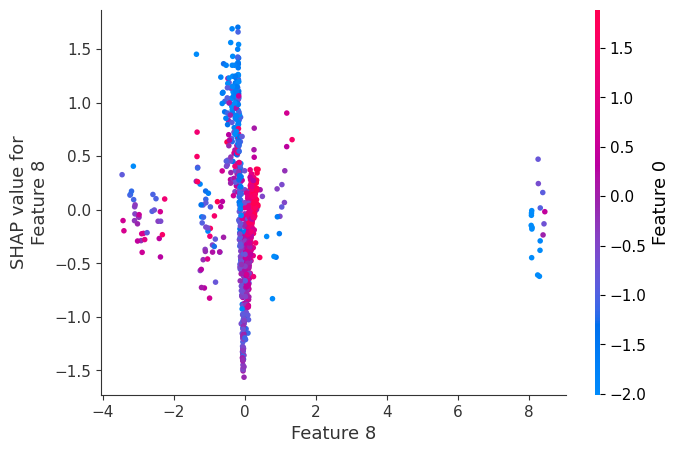

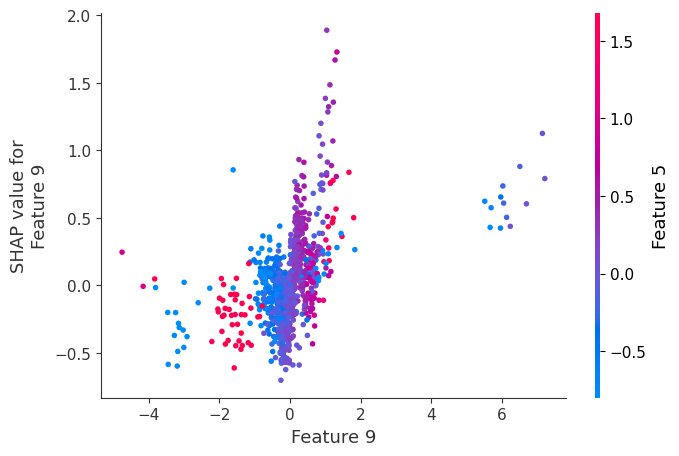

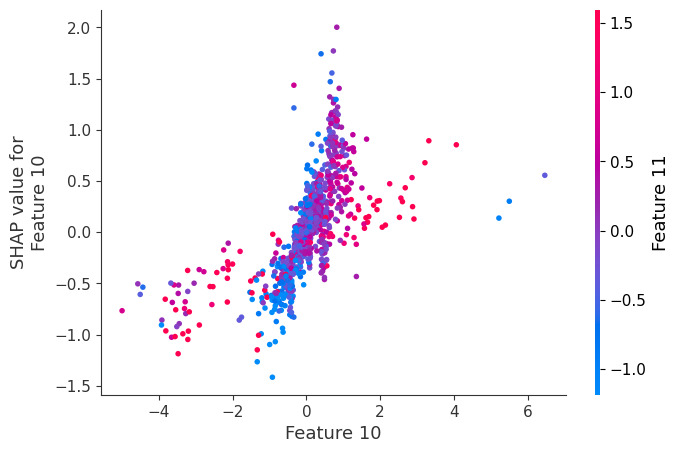

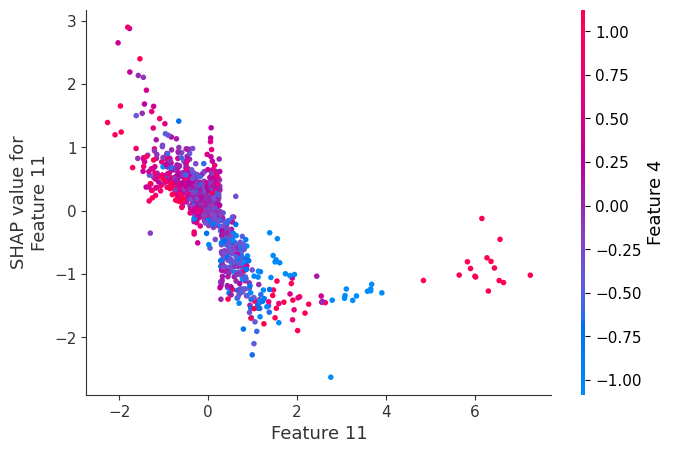

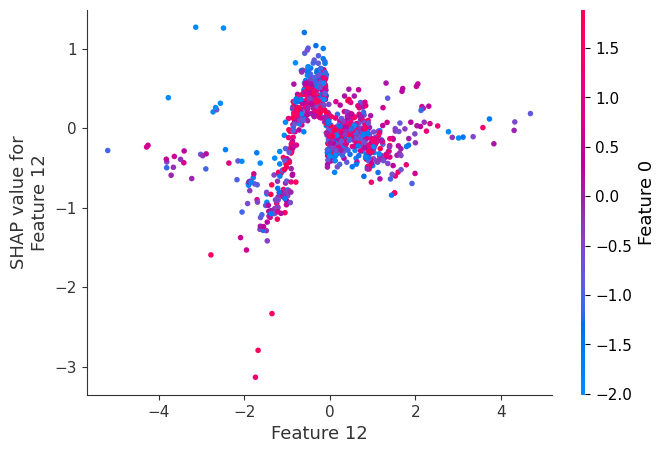

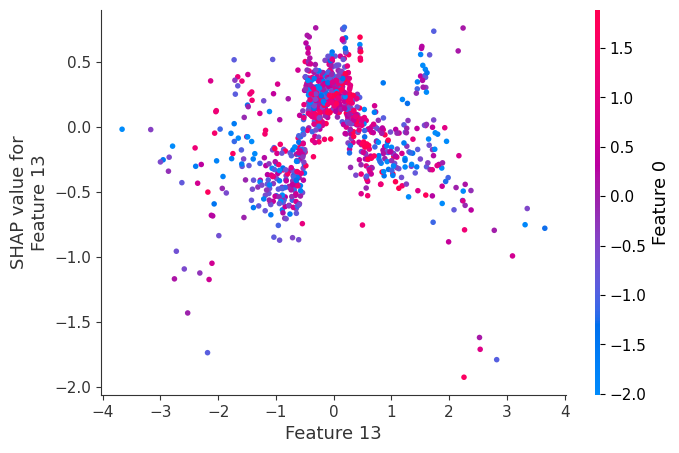

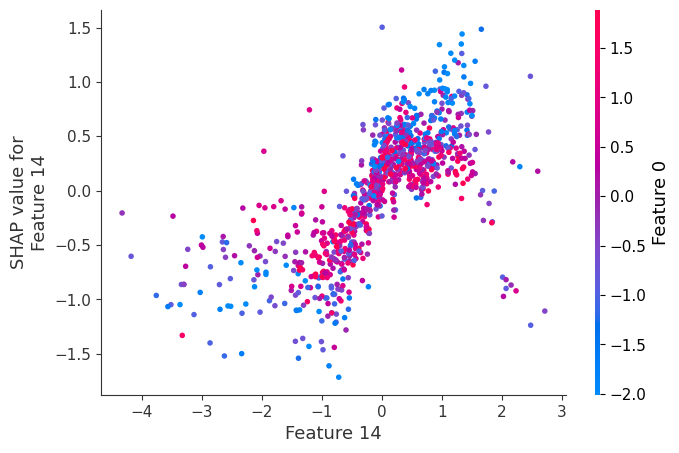

In [ ]:
# Calcul des valeurs SHAP pour le modèle GBM
explainer = shap.TreeExplainer(best_gbm)
shap_values = explainer.shap_values(X_test_pca)

# Affichage du SHAP summary plot en beeswarm
shap.summary_plot(shap_values, X_test_pca)

# Dépendance plot pour chaque feature (optionnel si tu veux explorer plus en détail)
for feature_index in range(X_test_pca.shape[1]):
    shap.dependence_plot(feature_index, shap_values, X_test_pca)


In [ ]:
# Sample a few rows for prediction
n_samples = 5 # Change this to the desired number of samples
sample_indices = np.random.choice(X_test_pca.shape[0], size=n_samples, replace=False)
sample_data = X_test_pca[sample_indices]
true_labels = y_test.iloc[sample_indices].values # Extract true labels for the sample data

# Make predictions
predicted_probabilities = best_gbm.predict_proba(sample_data)
predicted_labels = best_gbm.predict(sample_data)


# Print results
print("Sample Predictions:")
for i in range(n_samples):
    print(f"Instance {i+1}:")
    print(f"  True Label: {true_labels[i]}")
    print(f"  Predicted Label: {predicted_labels[i]}")
    print(f"  Predicted Probabilities (0,1): {predicted_probabilities[i]}")
    if predicted_labels[i] == true_labels[i]:
      print("  Correct prediction")
    else:
      print("  Incorrect prediction")
    print("-" * 20)

Sample Predictions:
Instance 1:
  True Label: 1
  Predicted Label: 1
  Predicted Probabilities (0,1): [9.09507121e-04 9.99090493e-01]
  Correct prediction
--------------------
Instance 2:
  True Label: 0
  Predicted Label: 0
  Predicted Probabilities (0,1): [0.9859854 0.0140146]
  Correct prediction
--------------------
Instance 3:
  True Label: 0
  Predicted Label: 0
  Predicted Probabilities (0,1): [9.99272665e-01 7.27334836e-04]
  Correct prediction
--------------------
Instance 4:
  True Label: 1
  Predicted Label: 1
  Predicted Probabilities (0,1): [2.56290884e-04 9.99743709e-01]
  Correct prediction
--------------------
Instance 5:
  True Label: 0
  Predicted Label: 0
  Predicted Probabilities (0,1): [0.99740977 0.00259023]
  Correct prediction
--------------------
